# Project 2: Ames Housing Data and Kaggle Challenge

## Contents:
- [Problem Statement](#Problem-Statement)
- [Dataset](#Dataset)
- [Setup](#Setup)
- [Loading Data](#Loading-Data)
- [Exploring Training Data](#Exploring-Training-Data)
- [Handling Outliers](#Handling-Outliers)
- [Missing Data](#Missing-Data)
- [Label Encoding](#Label-Encoding)
- [Data Visualisation](#Data-Visualisation)
- [Next Steps](#Next-Steps)

## Problem Statement
XYZ Housing Investing Corporation is an entity that focuses the majority of its business on investing in residential properties. As part of the newly hired data science team working in the XYZ Housing Investing Corporation, we have been tasked to use Ames housing dataset to build a model that predicts the price of houses in the city. The Ames housing dataset describes features of houses sold in Ames, Iowa from 2006 to 2010. The model’s output (a prediction of a house sale price) will be fed to another Machine Learning system, along with many other signals. This downstream system will determine whether it is worth investing in a given residential property or not. Getting this right is critical, as it directly affects revenue.

### Background
The housing prices are currently estimated manually by experts: a team gathers up-to-date information about a residential property, and estimates the sale price by manually assessing key characteristics that will most likely influence it. This is costly and time-consuming, and their estimates are not great; in cases where they manage to find out the actual eventual sale price of the property, they often realise that their estimates were off by more than 20%. This is why the company thinks that it would be useful to train a model to predict a house sale price. 

This is clearly a typical supervised learning task, since we are given labeled training examples (the expected output, i.e., SalePrice). It is also a typical regression task, since we are asked to predict a continuous value. More specifically, this is a multiple regression problem, since the system uses multiple features to make a prediction (i.e., it will use the year built, year remodel, neigbourhood etc.). It is also a univariate regression problem, since we are only trying to predict a single value for each observation. 


### Performance Measure
We will evaluate the performance of our model using Root Mean Square Error (RMSE) as the North Star metric.

The mathematical formula to compute the RMSE:
#### $RMSE(\mathbf{y},\hat{\mathbf{y}}) = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}$

Our goal is to get RMSE as close to 0 as possible.

RMSE gives an idea of how much error the model typically makes in its predictions. In other words, it tells us how concentrated the data is around the line of best fit.


## Dataset
The Ames housing dataset contains information from the Ames Assessor’s Office used in computing the value of individual residential properties sold in Ames, Iowa from 2006 to 2010, as well as the actual eventual sale prices for the properties. The dataset contains information on 2929 observations, and 81 variables. The data has 81 columns which include 22 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers).
- Nominal (categorical), meaning they are non-numerical and lack clear-cut order (Examples: Neighborhood, Type of roofing).
- Ordinal (categorical), meaning they are categorical but have a clear order (Example: Heating Quality (Excellent, Good, Average, Poor)).
- Discrete, meaning they are numerical but at set intervals (Example: Year Built, Number of Fireplaces). 
- Continuous, meaning they are numerical and can theoretically take any value in a range (Example: 1st Floor Square Feet).

### Data Dictionary
|Attribute|Variable Type |Dataset|Description|
|---|---|---|---|
|**Id**|*Discrete*|Ames Housing|Unique ID for each property|
|**PID**|*Nominal*|Ames Housing|Parcel identification number  - can be used with city web site for parcel review|
|**MS SubClass**|*Nominal*|Ames Housing|Identifies the type of dwelling involved in the sale|
|**MS Zoning**|*Nominal*|Ames Housing|Identifies the general zoning classification of the sale|
|**Lot Frontage**|*Continuous*|Ames Housing|Linear feet of street connected to property|
|**Lot Area**|*Continuous*|Ames Housing|Lot size in square feet|
|**Street**|*Nominal*|Ames Housing|Type of road access to property|
|**Alley**|*Nominal*|Ames Housing|Type of alley access to property|
|**Lot Shape**|*Ordinal*|Ames Housing|General shape of property|
|**Land Contour**|*Nominal*|Ames Housing|Flatness of the property|
|**Utilities**|*Ordinal*|Ames Housing|Type of utilities available|
|**Lot Config**|*Nominal*|Ames Housing|Lot configuration|
|**Land Slope**|*Ordinal*|Ames Housing|Slope of property|
|**Neighborhood**|*Nominal*|Ames Housing|Physical locations within Ames city limits (map available)|
|**Condition 1**|*Nominal*|Ames Housing|Proximity to various conditions|
|**Condition 2**|*Nominal*|Ames Housing|Proximity to various conditions (if more than one is present)|
|**Bldg Type**|*Nominal*|Ames Housing|Type of dwelling|
|**House Style**|*Nominal*|Ames Housing|Style of dwelling|
|**Overall Qual**|*Ordinal*|Ames Housing|Rates the overall material and finish of the house|
|**Overall Cond**|*Ordinal*|Ames Housing|Rates the overall condition of the house|
|**Year Built**|*Discrete*|Ames Housing|Original construction date|
|**Year Remod/Add**|*Discrete*|Ames Housing|Remodel date (same as construction date if no remodeling or additions)|
|**Roof Style**|*Nominal*|Ames Housing|Type of roof|
|**Roof Matl**|*Nominal*|Ames Housing|Roof material|
|**Exterior 1st**|*Nominal*|Ames Housing|Exterior covering on house|
|**Exterior 2nd**|*Nominal*|Ames Housing|Exterior covering on house (if more than one material)|
|**Mas Vnr Type**|*Nominal*|Ames Housing|Masonry veneer type|
|**Mas Vnr Area**|*Continuous*|Ames Housing|Masonry veneer area in square feet|
|**Exter Qual**|*Ordinal*|Ames Housing|Evaluates the quality of the material on the exterior |
|**Exter Cond**|*Ordinal*|Ames Housing|Evaluates the present condition of the material on the exterior|
|**Foundation**|*Nominal*|Ames Housing|Type of foundation|
|**Bsmt Qual**|*Ordinal*|Ames Housing|Evaluates the height of the basement|
|**Bsmt Cond**|*Ordinal*|Ames Housing|Evaluates the general condition of the basement|
|**Bsmt Exposure**|*Ordinal*|Ames Housing|Refers to walkout or garden level walls|
|**BsmtFin Type 1**|*Ordinal*|Ames Housing|Rating of basement finished area|
|**BsmtFin SF 1**|*Continuous*|Ames Housing|Type 1 finished square feet|
|**BsmtFin Type 2**|*Ordinal*|Ames Housing|Rating of basement finished area (if multiple types)|
|**BsmtFin SF 2**|*Continuous*|Ames Housing|Type 2 finished square feet|
|**Bsmt Unf SF**|*Continuous*|Ames Housing|Unfinished square feet of basement area|
|**Total Bsmt SF**|*Continuous*|Ames Housing|Total square feet of basement area|
|**Heating**|*Nominal*|Ames Housing|Type of heating|
|**Heating QC**|*Ordinal*|Ames Housing|Heating quality and condition|
|**Central Air**|*Nominal*|Ames Housing|Central air conditioning|
|**Electrical**|*Ordinal*|Ames Housing|Electrical system|
|**1st Flr SF**|*Continuous*|Ames Housing|First Floor square feet|
|**2nd Flr SF**|*Continuous*|Ames Housing|Second floor square feet|
|**Low Qual Fin SF**|*Continuous*|Ames Housing|Low quality finished square feet (all floors)|
|**Gr Liv Area**|*Continuous*|Ames Housing|Above grade (ground) living area square feet|
|**Bsmt Full Bath**|*Discrete*|Ames Housing|Basement full bathrooms|
|**Bsmt Half Bath**|*Discrete*|Ames Housing|Basement half bathrooms|
|**Full Bath**|*Discrete*|Ames Housing|Full bathrooms above grade|
|**Half Bath**|*Discrete*|Ames Housing|Half baths above grade|
|**Bedroom AbvGr**|*Discrete*|Ames Housing|Bedrooms above grade (does NOT include basement bedrooms)|
|**Kitchen AbvGr**|*Discrete*|Ames Housing|Kitchens above grade|
|**Kitchen Qual**|*Ordinal*|Ames Housing|Kitchen quality|
|**TotRms AbvGrd**|*Discrete*|Ames Housing|Total rooms above grade (does not include bathrooms)|
|**Functional**|*Ordinal*|Ames Housing|Home functionality (Assume typical unless deductions are warranted)|
|**Fireplaces**|*Discrete*|Ames Housing|Number of fireplaces|
|**Fireplace Qu**|*Ordinal*|Ames Housing|Number of fireplaces|
|**Garage Type**|*Nominal*|Ames Housing|Garage location|
|**Garage Yr Blt**|*Discrete*|Ames Housing|Year garage was built|
|**Garage Finish**|*Ordinal*|Ames Housing|Interior finish of the garage|
|**Garage Cars**|*Discrete*|Ames Housing|Size of garage in car capacity|
|**Garage Area**|*Continuous*|Ames Housing|Size of garage in square feet|
|**Garage Qual**|*Ordinal*|Ames Housing|Garage quality|
|**Garage Cond**|*Ordinal*|Ames Housing|Garage condition|
|**Paved Drive**|*Ordinal*|Ames Housing|Paved driveway|
|**Wood Deck SF**|*Continuous*|Ames Housing|Wood deck area in square feet|
|**Open Porch SF**|*Continuous*|Ames Housing|Open porch area in square feet|
|**Enclosed Porch**|*Continuous*|Ames Housing|Enclosed porch area in square feet|
|**3Ssn Porch**|*Continuous*|Ames Housing|Three season porch area in square feet|
|**Screen Porch**|*Continuous*|Ames Housing|Screen porch area in square feet|
|**Pool Area**|*Continuous*|Ames Housing|Pool area in square feet|
|**Pool QC**|*Ordinal*|Ames Housing|Pool quality|
|**Fence**|*Ordinal*|Ames Housing|Fence quality|
|**Misc Feature**|*Nominal*|Ames Housing|Miscellaneous feature not covered in other categories|
|**Misc Val**|*Continuous*|Ames Housing|Dollar-Value of miscellaneous feature|
|**Mo Sold**|*Discrete*|Ames Housing|Month Sold (MM)|
|**Yr Sold**|*Discrete*|Ames Housing|Year Sold (YYYY)|
|**Sale Type**|*Nominal*|Ames Housing|Type of sale|
|**SalePrice**|*Continuous*|Ames Housing|Sale price $$ (target)|

## Setup
All libraries used should be added here.

In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import KNNImputer
import scipy.stats

In [2]:
# path to save the figures
assets_path = '../assets'
os.makedirs(assets_path, exist_ok=True)

# Create a function to save figures
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(assets_path, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading Data

Import the datasets required.

In [3]:
# set the input and output relative paths
input_path = '../datasets'
output_path = '../datasets_cleaned'
os.makedirs(output_path, exist_ok=True)

In [4]:
# write a function to load the training data
def load_housing_train_data(filename='train.csv'):
    csv_train_path = os.path.join(input_path, filename)
    return pd.read_csv(csv_train_path)

# write a function to load the test data
def load_housing_test_data(filename='test.csv'):
    csv_test_path = os.path.join(input_path, filename)
    return pd.read_csv(csv_test_path)

In [5]:
train_df = load_housing_train_data()
test_df = load_housing_test_data()

In [6]:
print('Our training dataset has {} rows and {} columns.'.format(train_df.shape[0], train_df.shape[1]))
print('Our test dataset has {} rows and {} columns.'.format(test_df.shape[0], test_df.shape[1]))

Our training dataset has 2051 rows and 81 columns.
Our test dataset has 878 rows and 80 columns.


## Exploring Training Data
First, make sure that the test has been set aside and we are only exploring the training set. Let’s create a copy so that we can play with it without harming the training set:

In [7]:
housing = train_df.copy()

### Display data
Let’s take a look at the top five rows using the DataFrame’s head() method.

In [8]:
# check the first five rows
display(housing.head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


Each row represents one property. There are a total of 81 attributes.

The info() method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of non-null values .

In [9]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               2051 non-null   int64  
 1   PID              2051 non-null   int64  
 2   MS SubClass      2051 non-null   int64  
 3   MS Zoning        2051 non-null   object 
 4   Lot Frontage     1721 non-null   float64
 5   Lot Area         2051 non-null   int64  
 6   Street           2051 non-null   object 
 7   Alley            140 non-null    object 
 8   Lot Shape        2051 non-null   object 
 9   Land Contour     2051 non-null   object 
 10  Utilities        2051 non-null   object 
 11  Lot Config       2051 non-null   object 
 12  Land Slope       2051 non-null   object 
 13  Neighborhood     2051 non-null   object 
 14  Condition 1      2051 non-null   object 
 15  Condition 2      2051 non-null   object 
 16  Bldg Type        2051 non-null   object 
 17  House Style   

There are 2,051 instances in the dataset, which means that it is fairly small by Machine Learning standards. Notice that there are 26 attributes with missing values. We will need to take care of this later. `PID`, `MS SubClass`, `Overall Qual`, and `Overall Cond` are of integer types when they are supposed to be an object type. Let's convert these values to object type first.

In [10]:
columns = ['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond']

for col in housing.columns:
    if col in columns:
        housing[col] = housing[col].astype(object)
    else:
        continue
        
# examine the dtypes
housing[['PID', 'MS SubClass', 'Overall Qual', 'Overall Cond']].dtypes

PID             object
MS SubClass     object
Overall Qual    object
Overall Cond    object
dtype: object

In [11]:
# Split the numeric and categorical features
numeric_features = [col for col in housing._get_numeric_data().columns]
categorical_features = [col for col in housing.select_dtypes(include=['object']).columns]

In [12]:
print('There are', len(numeric_features), 'numeric features.')
print('There are', len(categorical_features), 'categorical features.')

There are 35 numeric features.
There are 46 categorical features.


### Exploring the target variable: SalePrice

Saving figure SalePrice_histogram_plot


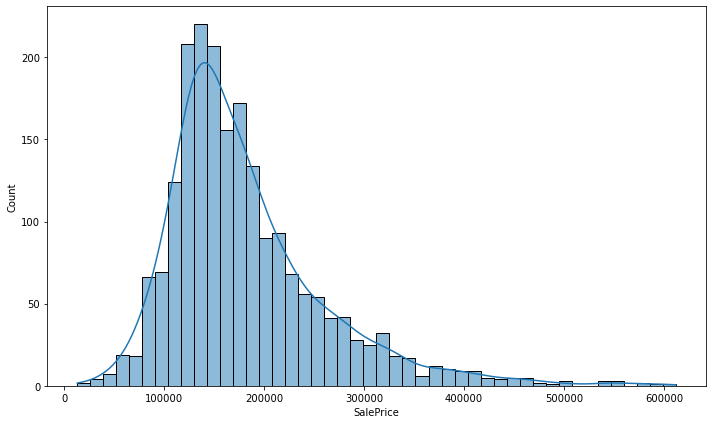

In [13]:
# Let's plot the distribution of our target variable, SalePrice
plt.figure(figsize=(10,6))
sns.histplot(housing['SalePrice'], kde=True)
save_fig("SalePrice_histogram_plot")
plt.show()

We see that SalePrice is positively skewed (skewed right): its right tail is longer and most of the distribution is at the left. We will try transforming this variable later on.

In [14]:
print('Skew: {:.3f} | Kurtosis: {:.3f}'.format(
    housing['SalePrice'].skew(), housing['SalePrice'].kurtosis()))

Skew: 1.558 | Kurtosis: 3.579


### Visualise the distribution of our numeric features
Plot a histogram for each numerical attributes.

Saving figure numerical_features_histogram_plots


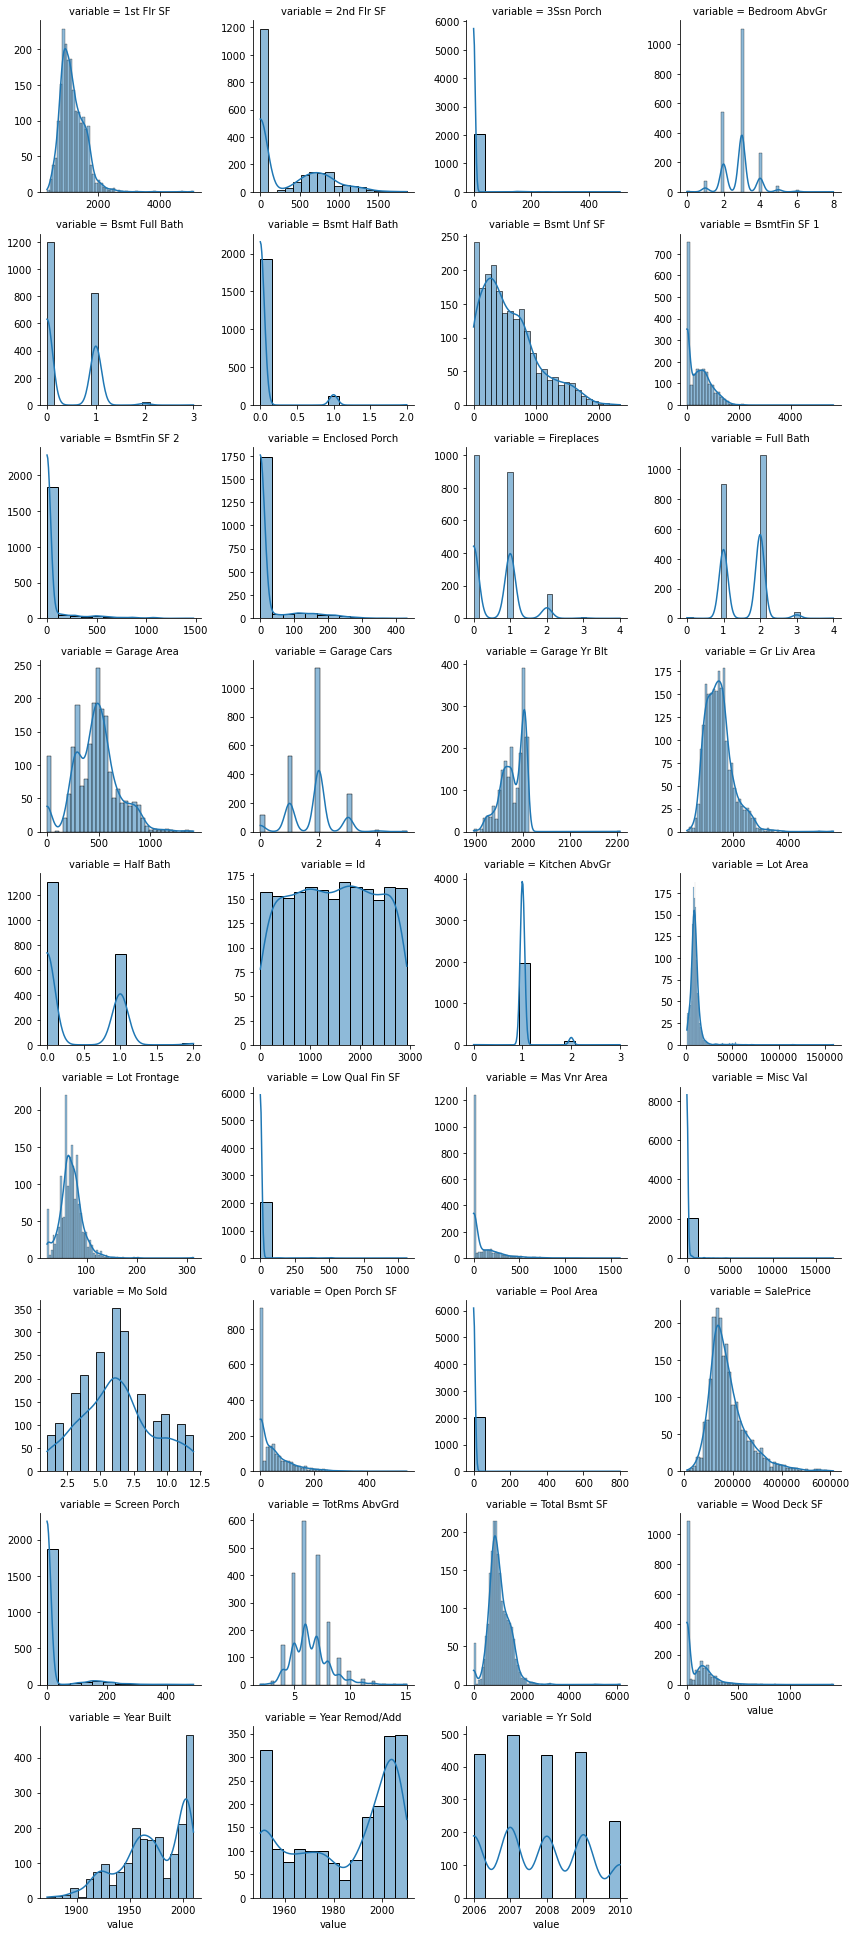

In [15]:
# Plot a histogram for each numerical attributes.
num = pd.melt(housing, value_vars=sorted(numeric_features))
g = sns.FacetGrid(num, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value', kde=True)
save_fig("numerical_features_histogram_plots")
plt.show()

* First, these features have very different scales. 
* Many histograms, including our target variable: `SalePrice`, are positively skewed (skewed right). This may make it a bit harder for some Machine Learning algorithms to detect patterns. We will try transforming these attributes (include: `Lot Frontage`, `Lot Area`, `Bsmt Unf SF`, `Total Bsmt SF`, `1st Flr SF`, `Gr Liv Area` & `Garage Area`) later on to have more bell-shaped distributions.
* Some features such as `Bsmt Full Bath`, `Bsmt Half Bath`, `Full Bath`, `Half Bath`, `Bedroom AbvGr`, `Kitchen AbvGr`, `TotRms AbvGrd`, `Fireplaces` & `GarageCars` are considered as count data. Hence, we don't want to transform them.
* We see time related features such as `Year Built`, `Year Remod/Add`, `Garage Yr Blt`, `Mo Sold` & `Yr Sold`.
* There are outliers that we may have to investigate and deal with later on.
* Finally, we observed that certain features such as `BsmtFin SF 2`, `Low Qual Fin SF`,`Enclosed Porch`, `3Ssn Porch`, `Screen Porch`, `Pool Area` & `Misc Val`  have little/no variability as the distribution of the histogram shows that the data are mostly placed into a single bar. These features might be ineffective in predicting sale price.

The describe() method shows a summary of the numerical features.

In [16]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2051.0,1474.033642,843.980841,1.0,753.5,1486.0,2198.00,2930.0
Lot Frontage,1721.0,69.055200,23.260653,21.0,58.0,68.0,80.00,313.0
Lot Area,2051.0,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.50,159000.0
Year Built,2051.0,1971.708922,30.177889,1872.0,1953.5,1974.0,2001.00,2010.0
Year Remod/Add,2051.0,1984.190151,21.036250,1950.0,1964.5,1993.0,2004.00,2010.0
Mas Vnr Area,2029.0,99.695909,174.963129,0.0,0.0,0.0,161.00,1600.0
BsmtFin SF 1,2050.0,442.300488,461.204124,0.0,0.0,368.0,733.75,5644.0
BsmtFin SF 2,2050.0,47.959024,165.000901,0.0,0.0,0.0,0.00,1474.0
Bsmt Unf SF,2050.0,567.728293,444.954786,0.0,220.0,474.5,811.00,2336.0
Total Bsmt SF,2050.0,1057.987805,449.410704,0.0,793.0,994.5,1318.75,6110.0


Some observations:
* The cheapest house is sold for `$12,789` and the most expensive for `$611,657`. The average sales price is `$181,469.70`, while median is `$162,500`.
* The oldest house is built in 1872, while the newest house is built in 2010.
* Houses on average have 1,515 sq ft of livable space above the ground. The median is 1,444 sq ft of space. The biggest house has 5,642 sq ft of livable space above the ground, while the smallest house has 334 sq ft.
* The average lot area is 10,065.21 sq ft, the median lot area is 9,430 sq ft. The biggest lot area is 159,000 sq ft, while the smallest lot area is 1,300 sq ft.
* The oldest garage is built in 1895. It is strange that the newest garage was built in 2207 (maximum value for `Garage Yr Blt`). Hence, this could be a data entry error.

### Exploring the relationship between our numeric features and target variable: SalePrice
A key step in our EDA is to explore whether there is a relationship between our potential features and target variable, SalePrice. As a start, we will proceed with calculating the correlation between our numeric features and SalePrice.


#### The most important numeric features
Using our numeric attributes, we can calculate the pair-wise correlation between potential features and our target.

Saving figure important_numerical_features


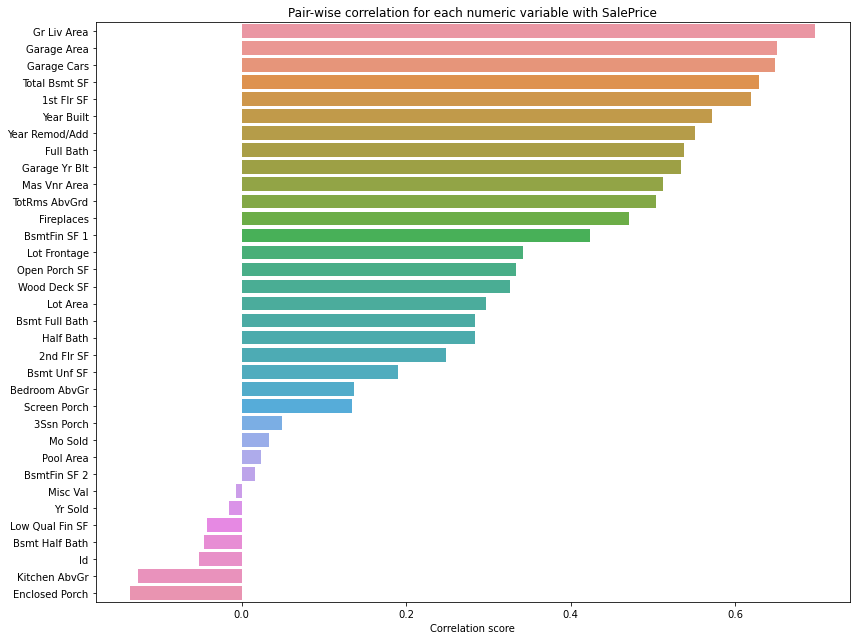

In [17]:
# Get pair-wise correlation for each numeric variable with the target
corr = housing[numeric_features].corr()['SalePrice'].sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,9))
sns.barplot(x=corr[1:].values, y=corr[1:].index)
plt.xlabel('Correlation score')
plt.title('Pair-wise correlation for each numeric variable with SalePrice')

save_fig("important_numerical_features")
plt.show()

There are several factors influencing sale price here:
* Firstly, we can see that **'Above Grade' Living Area (this is the proportion of the house that is not in a basement) has the strongest positive correlation with SalePrice** among all the numeric features. From this we can infer that houses with large livable space above the ground are generally more expensive. 
* Secondly, **the size of the garage (both in terms of number of cars and area in square feet) have a strong positive correlation with SalePrice.** This suggests that houses with larger garage space tends to be more expensive, and vice versa. Having a garage can increase the valuation of a house. 
* Thirdly, **the actual age (in terms of year built) and effective age (in terms of remodel date) of the house have a strong positive correlation with SalePrice.** Typically, homes that are newer appraise at a higher value.

Overall, we can see that variables associated to home size, usable space, and age of a house are critical in influencing sale price. 

The following variables have **very weak correlation** with sale price:
* `3Ssn Porch`
* `Mo Sold`
* `Pool Area`
* `BsmtFin SF 2  `
* `Misc Val   `
* `Yr Sold   `
* `Low Qual Fin SF `
* `Bsmt Half Bath ` 

It is worth noting that the `Yr Sold` has minimal impact on sale price even though there was a collapse of the U.S. housing market during the [financial crisis of 2007–08](https://www.britannica.com/event/financial-crisis-of-2007-2008). Given that we are talking about only 5 years of sales, perhaps it would be more appropriate to categorise the `Yr Sold` as a nominal (categorical) variable later on. 

**Visualise the correlation heatmap of numeric features with a correlation of at least 0.5 with SalePrice**

Saving figure correlation_heatmap


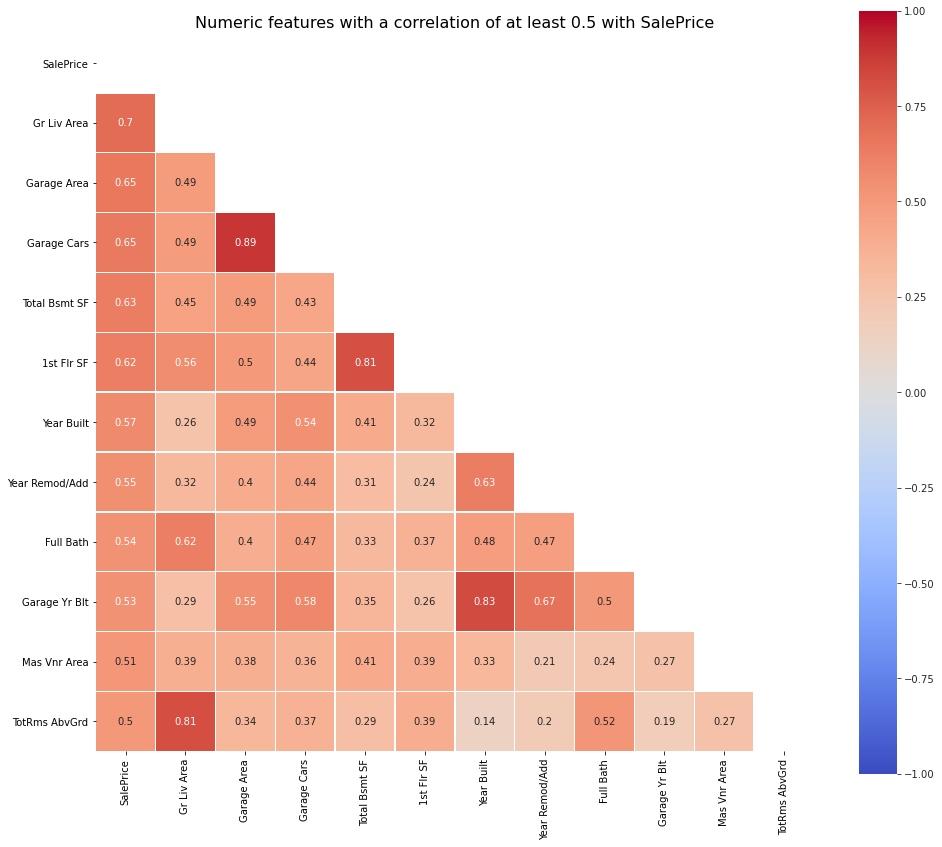

In [18]:
# Establish size of figure.
plt.figure(figsize = (14,12))

# Get correlation of variables.
corr = housing[numeric_features].corr()['SalePrice'].sort_values(ascending=False)
corr = corr[abs(corr) > 0.5].index
corr = housing[corr].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot title
plt.title("Numeric features with a correlation of at least 0.5 with SalePrice", fontsize = 16)

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap= 'coolwarm')
    
save_fig("correlation_heatmap")

We can see that there are 11 numeric variables with a correlation of at least 0.5 with SalePrice. All those correlations are positive.

It also becomes clear that multicollinearity is an issue. For example: the correlation between GarageCars and GarageArea is very high (0.89), and both have similar (high) correlations with SalePrice.

**Plot a scatter plot to view the relationship between Gr Liv Area and SalePrice**

The most promising attribute to predict SalePrice is the `Gr Liv Area`, so let’s zoom in on their correlation scatterplot.

In [19]:
# Function to plot scatter plot
def plot_scatterplot(df, x, y, title):
    fig, ax = plt.subplots(figsize=(10,6))
    plt.title(title)
    sns.regplot(data=df, x=x, y=y)
    plt.tight_layout()

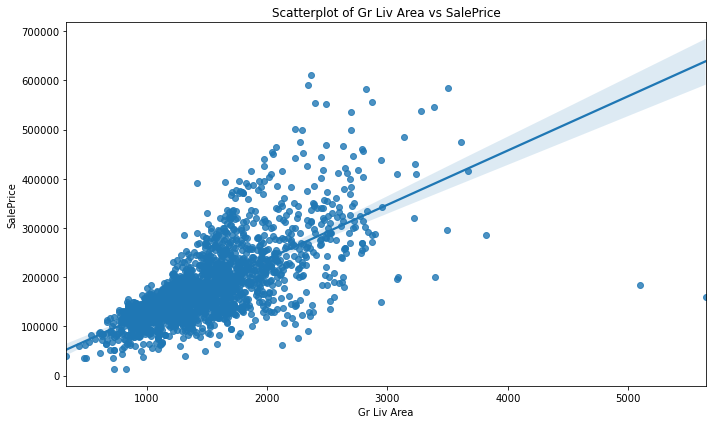

In [20]:
plot_scatterplot(housing, 'Gr Liv Area', 'SalePrice', 'Scatterplot of Gr Liv Area vs SalePrice')

plt.xlabel('Gr Liv Area')
plt.ylabel('SalePrice');

This plot reveals a few things. First, the correlation is indeed very strong; we can clearly see the upward trend, and the points are not too dispersed. Second, this plot reveals clear outliers on the far right. We can see two houses with really large livable space above the ground, yet have low SalePrices.

We may want to try removing the outliers after investigating on the reason during our data cleaning steps.

**Plot a scatter plot to view the relationship between the size of the garage and SalePrice**

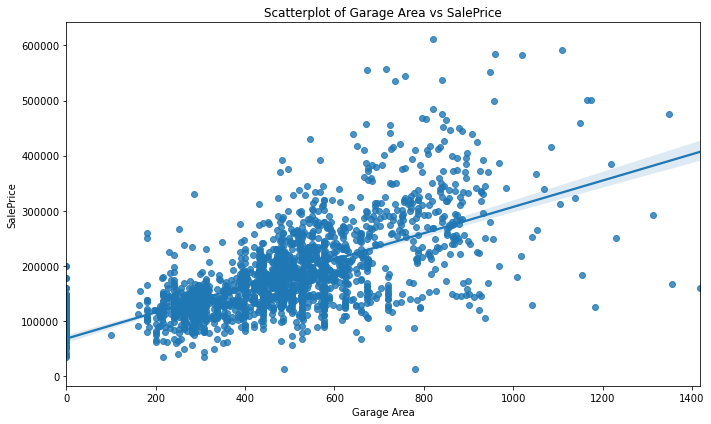

In [21]:
plot_scatterplot(housing, 'Garage Area', 'SalePrice', 'Scatterplot of Garage Area vs SalePrice')

plt.xlabel('Garage Area')
plt.ylabel('SalePrice');

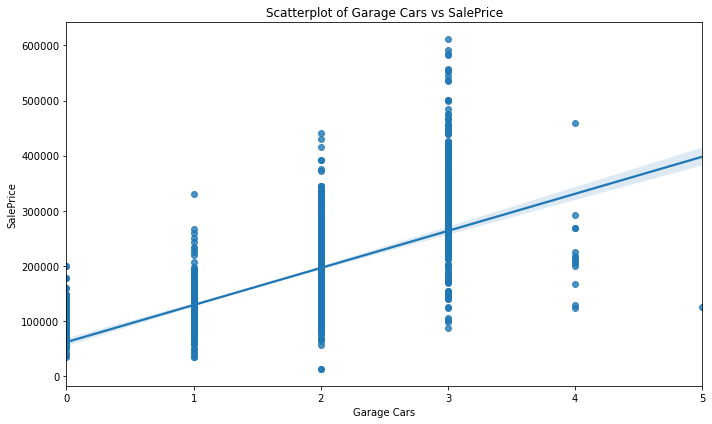

In [22]:
plot_scatterplot(housing, 'Garage Cars', 'SalePrice', 'Scatterplot of Garage Cars vs SalePrice')

plt.xlabel('Garage Cars')
plt.ylabel('SalePrice');

The positive correlation is certainly there indeed. Regarding outliers, we do not see any extreme values.

### Exploring the relationship between our categorical features and target variable: SalePrice
The box-and-whisker plot is commonly used for visualising relationships between numerical variables and categorical variables. Let’s start by creating box-and-whisker plots with seaborn’s boxplot method:

Saving figure categorical_features_box_plots


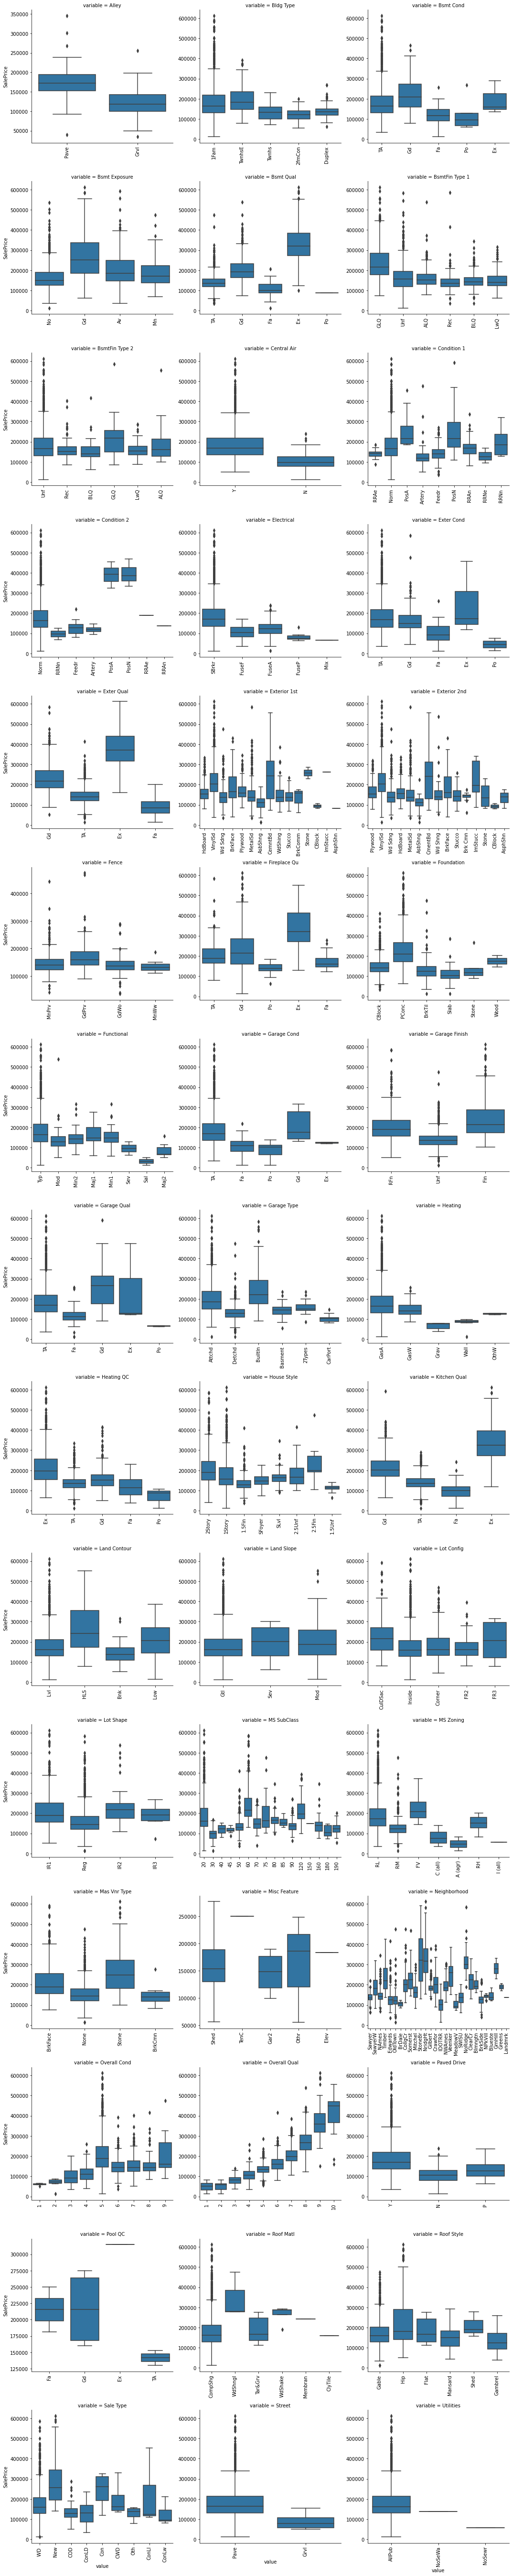

In [23]:
# box plots of categorical features
cat = pd.melt(housing, id_vars=['SalePrice'], value_vars=sorted(categorical_features[1:]))
g = sns.FacetGrid(cat, col='variable', col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(sns.boxplot, 'value', 'SalePrice', order=None)
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
g.fig.tight_layout()
save_fig("categorical_features_box_plots")
plt.show()

Here, we have iterated through every subplot to produce the visualisation between all categorical variables and the SalePrice. We can see that there is significant variance in `SalePrice` between houses with different `Overall Qual` & `Neighborhood`. 

#### The most important categorical features
To have a better understanding of which categorical features has greater influence on `SalePrice`, we planned to run a Kruskal Wallis test for each categorical feature against `SalePrice`. The [Kruskal Wallis Test](https://www.geeksforgeeks.org/kruskal-wallis-test/) is a nonparametric alternative to One-Way ANOVA.

This will give us both the F statistic and p-values for each feature. The higher the F statistic, the lower the p-value (i.e. the more confident we are in rejecting the null hypothesis).

The Kruskal Wallis Test has one Null Hypothesis i.e. – The distributions are Equal. Here, we will check whether there is equal variance between groups of categorical feature wrt `SalePrice`. If there is equal variance between groups, it means this feature has no impact on `SalePrice` and it can not be considered for model training.

Saving figure important_categorical_features


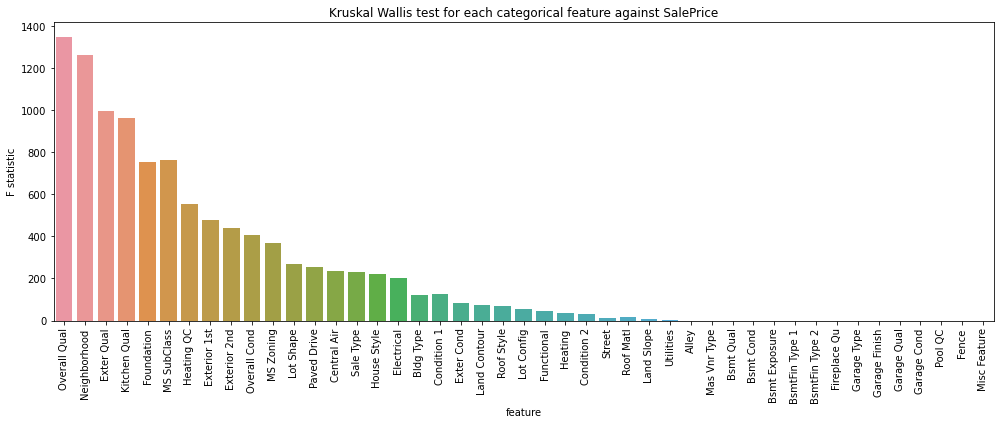

In [24]:
# In order for the Kruskal Wallis test to work, we have to take care of missing values first
# create a copy of the housing dataframe
housing_dup = housing.copy()
housing_dup[categorical_features[1:]] = housing_dup[categorical_features[1:]].fillna('Missing')

kruskal = {'feature':[], 'f':[], 'p':[]}
for cat in categorical_features[1:]:
    group_prices = []
    for group in housing_dup[cat].unique():
        group_prices.append(housing_dup[housing[cat] == group]['SalePrice'].values)
    f, p = scipy.stats.kruskal(*group_prices)
    kruskal['feature'].append(cat)
    kruskal['f'].append(f)
    kruskal['p'].append(p)
kruskal = pd.DataFrame(kruskal)
kruskal = kruskal[['feature','f','p']]
kruskal.sort_values('p', inplace=True)

# Plot
plt.figure(figsize=(14,6))
sns.barplot(x=kruskal.feature, y=kruskal['f'])
plt.xticks(rotation=90)
plt.ylabel('F statistic')
plt.title('Kruskal Wallis test for each categorical feature against SalePrice')

save_fig("important_categorical_features")
plt.show()

5 of those most important categorical features are: `Overall Qual`, `Neighborhood`, `Exter Qual`, `Bsmt Qual`, and `Kitchen Qual`. We noticed that the quality variables are important in influencing sale price. We can also confirm the real estate mantra of "location, location, location" as `Neighborhood` appears to have the second greatest influence on sale price.

**Plot a boxplot to view the relationship between Overall Qual and SalePrice**

Overall quality is the most important categorical variable that appears to have the greatest influence on sale price, so let’s take a closer look at the variable.

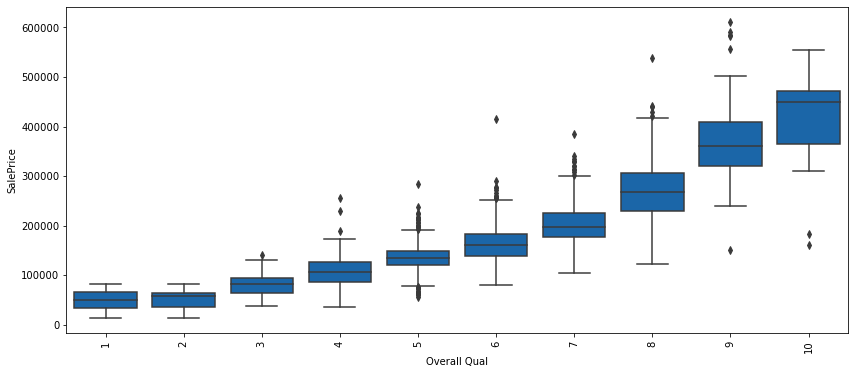

In [25]:
sorted_overall = housing.groupby(['Overall Qual'])['SalePrice'].median().sort_values()

# Plot
plt.figure(figsize=(14,6))
sns.boxplot(x=housing['Overall Qual'], y=housing['SalePrice'], order=list(sorted_overall.index),
                 color='#0468BF')
plt.xticks(rotation=90)
plt.show()

We can see that `Overall Qual ` certainly has a postitive relationship with `SalePrice`. We are able to observe a slightly upward curve. 
Houses with higher rating on overall quality have higher median sale price. 

**Plot a boxplot to view the relationship between Neighborhood and SalePrice**

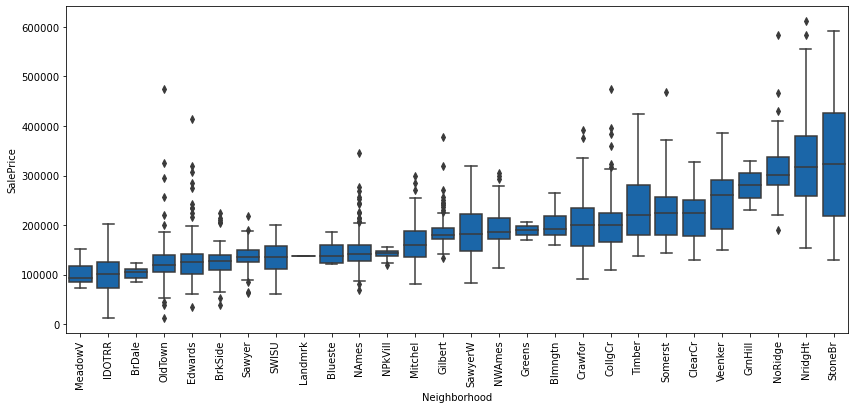

In [26]:
sorted_nb = housing.groupby(['Neighborhood'])['SalePrice'].median().sort_values()

# Plot
plt.figure(figsize=(14,6))
sns.boxplot(x=housing['Neighborhood'], y=housing['SalePrice'], order=list(sorted_nb.index),
                 color='#0468BF')
plt.xticks(rotation=90)
plt.show()

Houses in the cheaper neighborhoods are sold for a median price of around `$100,000`, while houses in the expensive neighborhoods are sold for around `$300,000`. We can also see that for certain neighborhoods, dispersion between the sale price are low. This means that the sale price are closer to each other in these neighborhoods. In the most expensive neighborhood, 'StoneBr', however, we see a longer box — there is large dispersion in the distribution of sale price.

## Handling Outliers
There are a number of outliers within the data -- specifically these are properties that have more than 4000 square feet.This can be seen in our initial analysis when we plotted a scatterplot of Gr Liv Area vs SalePrice. 

In [27]:
def plot_outliers(feature, x_val):
    outliers = housing[housing[feature] > x_val][[feature,'SalePrice']].values
    outliers_idx = housing[housing[feature] > x_val].index
    
    # Plot outliers
    plt.figure(figsize=(14,7))
    ax = plt.gca()
    sns.scatterplot(data=housing, x=feature, y='SalePrice', ax=ax)
    sns.scatterplot(data=outliers, x=outliers[:,0], y=outliers[:,1], ax=ax, color='crimson', s=50)
    plt.xlabel(feature)
    plt.ylabel('Sale Price')

    for index, value in enumerate(outliers_idx):
        if feature == 'Gr Liv Area':
            xy=(-200, 15_000)
            ax.annotate(f'Idx: {value}', xy=(xy + outliers[-index-1]))
        elif feature == 'Garage Yr Blt':
            xy=(-10, 15_000)
            ax.annotate(f'Idx: {value}', xy=(xy + outliers[-index-1]))            
    plt.title(f'Scatterplot of {feature} versus Sale Price', fontsize=18)

Saving figure outliers_gr_liv_area


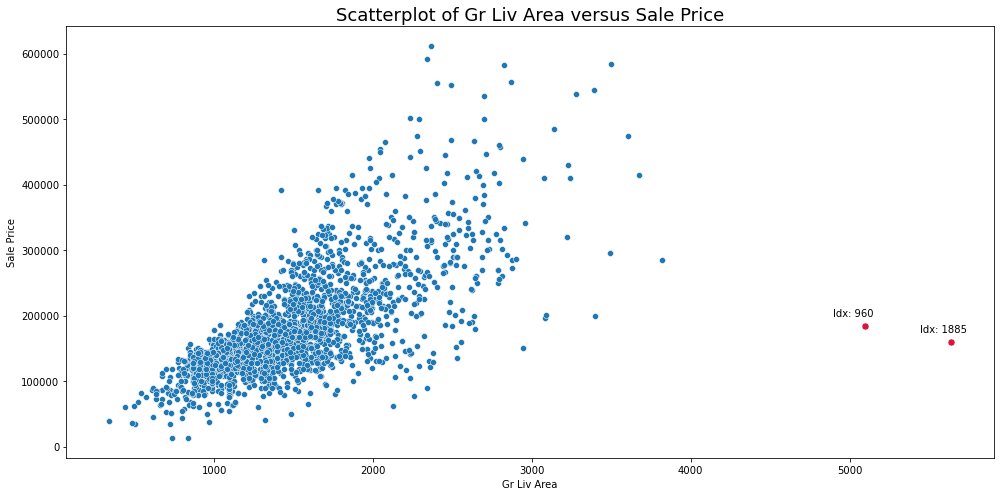

In [28]:
plot_outliers('Gr Liv Area', 4000)
save_fig("outliers_gr_liv_area")

The two houses seemed to be unusual sales (very large houses priced relatively appropriately). We will proceed to remove these 2 unusual observations from the data set.

In [29]:
# Retain houses with less than or equals to 4000 square feet
housing = housing[housing['Gr Liv Area'] <= 4000]

In our initial analysis, we also saw that the maximum value for `Garage Yr Blt` is 2207.

Saving figure outliers_garage_yr_built


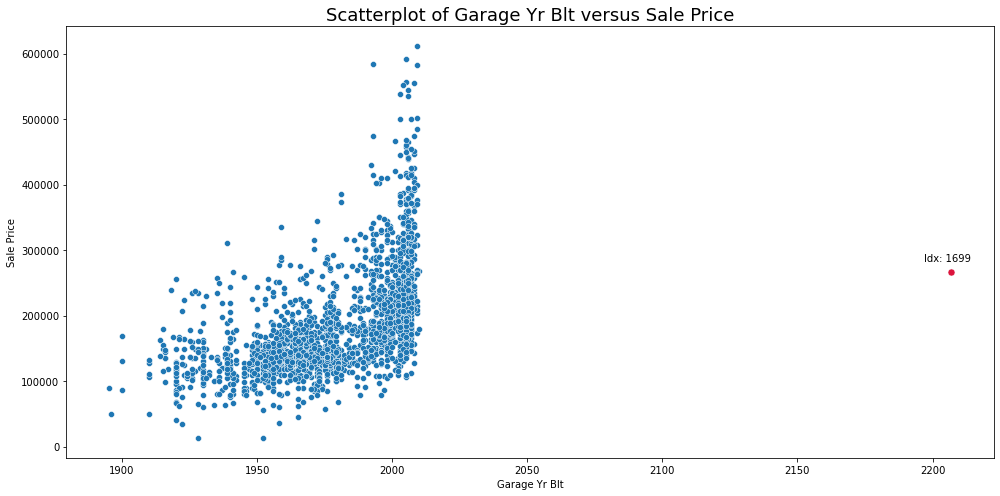

In [30]:
plot_outliers('Garage Yr Blt', 2010)
save_fig("outliers_garage_yr_built")

This unusual observation is clearly a data entry error. We will assign the original construction date to `Garage Yr Blt`.

In [31]:
# Replace the error value with the original construction date:
housing.at[1699,'Garage Yr Blt'] = housing.at[1699,'Year Built']

## Missing Data
Let's count the number of missing values in the dataset:

In [32]:
# Count missing values in the dataframe
missing = housing.isnull().sum()
print(missing[missing != 0].sort_values(ascending=False))

Pool QC           2041
Misc Feature      1985
Alley             1909
Fence             1649
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64


In [33]:
print('There are', len(missing[missing != 0]), 'columns with missing values.')

There are 26 columns with missing values.


### Dealing with missing data
We are going to fix the 26 predictors that contains missing values. First, we need to investigate whether it makes sense for certain attributes to have missing values. Following which, we will look into imputation techniques for treating missing numerical and categorical values.

1. [Pool Variables](#Pool-Variables)
2. [Miscellaneous Variables](#Miscellaneous-Variables)
3. [Alley](#Alley)
4. [Fence](#Fence)
5. [Fireplace Variables](#Fireplace-Variables)
6. [Lot Frontage](#Lot-Frontage)
7. [Garage Variables](#Garage-Variables)
8. [Basement Variables](#Basement-Variables)
9. [Masonry Variables](#Masonry-Variables)

#### Pool Variables

**1. Pool QC**

Pool QC (Ordinal): Pool quality

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

The `PoolQC` is the variable with the most missing values (total 2041 missing values). This means that we just have to assign ‘No Pool’ to the missing values. The high number of missing values here makes sense as in reality only a small proportion of houses will have a pool. 


**2. Pool Area**

Pool Area (Continuous): Pool area in square feet


The Pool Area (in square feet) is another variable related to Pools. We want to make sure that if a house has a pool, it means that both Pool Area and PoolQC should not be NA.


In [34]:
print("Pool Area equals 0: ", (housing['Pool Area']==0).sum())

Pool Area equals 0:  2041


In [35]:
# if Pool QC is null & Pool Area equals to 0, assign 'None' to Pool QC
housing.loc[(housing['Pool QC'].isna()) & (housing['Pool Area']==0), ['Pool QC']] = housing['Pool QC'].fillna('None')

In [36]:
housing['Pool QC'].value_counts()

None    2041
Gd         3
Fa         2
TA         2
Ex         1
Name: Pool QC, dtype: int64

In [37]:
# check for any nulls
housing[['Pool QC', 'Pool Area']].isnull().sum()

Pool QC      0
Pool Area    0
dtype: int64

In [38]:
# check if any houses with no pool have a pool area
display(housing[(housing['Pool QC'] == 'None') & (housing['Pool Area'] > 0)])

# check if any houses with a pool have pool area equals to 0
display(housing[(housing['Pool QC'] != 'None') & (housing['Pool Area'] == 0)])

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


#### Miscellaneous Variables

**1. Misc Feature**

Misc Feature (Nominal): Miscellaneous feature not covered in other categories

       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
There is a total of 1985 missing values. This means that we just have to assign ‘None’ to the missing values.

**2. Misc Val**

Misc Val (Continuous): Dollar-value of miscellaneous feature. 

The `Misc Val` is another variable related to miscellaneous feature. We want to make sure that if a house has a miscellaneous feature that is not covered in other categories, it means that both `Misc Feature` and `Misc Val` should not be NA. 

In [39]:
print("Misc Val equals 0: ", (housing['Misc Val']==0).sum())

Misc Val equals 0:  1985


In [40]:
# if Misc Feature is null & Misc Val equals to 0, assign 'None' to Misc Feature
housing.loc[(housing['Misc Feature'].isna()) & (housing['Misc Val'] == 0), ['Misc Feature']] = housing['Misc Feature'].fillna('None')

In [41]:
housing['Misc Feature'].value_counts()

None    1985
Shed      56
Gar2       4
Othr       3
TenC       1
Name: Misc Feature, dtype: int64

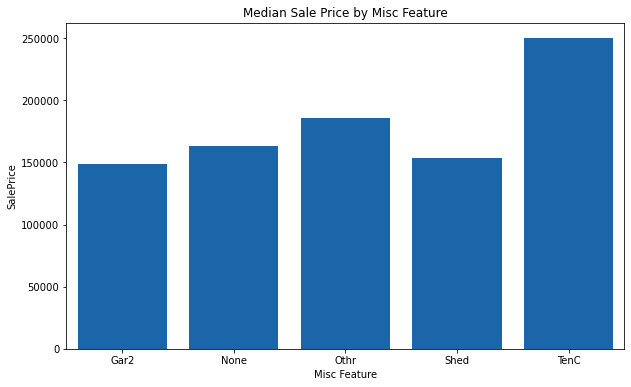

In [42]:
# plot median sale price by misc feature
plt.figure(figsize=(10,6))

sns.barplot(x='Misc Feature', y='SalePrice', data=housing.groupby('Misc Feature')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Misc Feature')

plt.show()

Looking at the value counts, it seems that only a small proportion of the houses have miscellaneous feature. It makes sense for a house with Tennis Court to be expensive. There is only one house with a tennis court in the training set.

In [43]:
# Check for any nulls
housing[['Misc Feature', 'Misc Val']].isnull().sum()

Misc Feature    0
Misc Val        0
dtype: int64

In [44]:
# check if any houses with no misc feature have a misc val
display(housing[(housing['Misc Feature'] == 'None') & (housing['Misc Val'] != 0)])

# check if any houses with a misc feature have misc val equals to 0
display(housing[(housing['Misc Feature'] != 'None') & (housing['Misc Val'] == 0)])

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


#### Alley

**1. Alley**

Alley (Nominal): Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
There is a total of 1909 observation with no alley access. It is not really common to have alley in properties. This means that we just have to assign ‘No alley access’ to the missing values. 

In [45]:
housing['Alley'] = housing['Alley'].fillna('None')

In [46]:
housing['Alley'].value_counts()

None    1909
Grvl      85
Pave      55
Name: Alley, dtype: int64

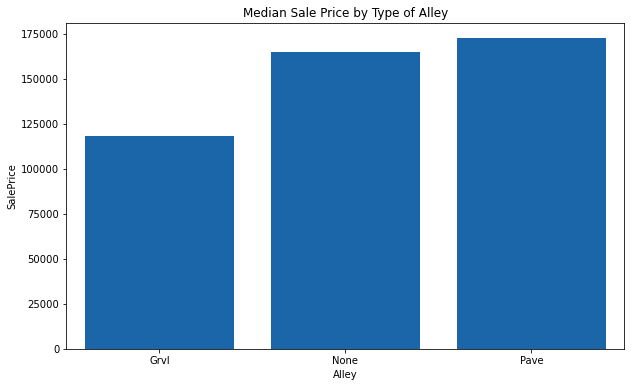

In [47]:
# plot median sale price by alley
plt.figure(figsize=(10,6))

sns.barplot(x='Alley', y='SalePrice', data=housing.groupby('Alley')['SalePrice'].median().reset_index(),
                 color='#0468BF')

plt.title('Median Sale Price by Type of Alley')

plt.show()

#### Fence

**1. Fence**

Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
There is a total of 1649 missing values. This means that we just have to assign ‘No Fence’ to the missing values. Given that Ames City is generally an urban area, it makes sense that not many houses have fence.

In [48]:
housing['Fence'] = housing['Fence'].fillna('None')

In [49]:
housing['Fence'].value_counts()

None     1649
MnPrv     227
GdPrv      83
GdWo       80
MnWw       10
Name: Fence, dtype: int64

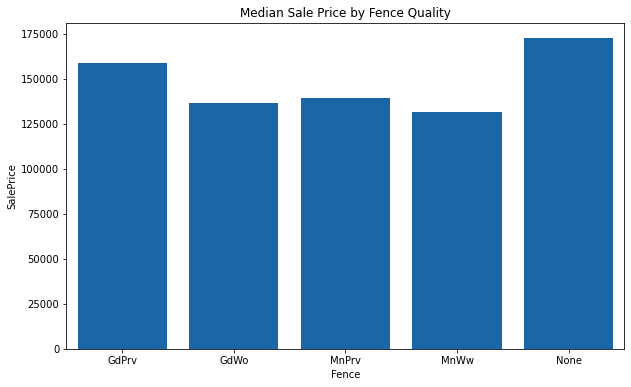

In [50]:
# plot median sale price by fence quality
plt.figure(figsize=(10,6))

sns.barplot(x='Fence', y='SalePrice', data=housing.groupby('Fence')['SalePrice'].median().reset_index(),
                 color='#0468BF')

plt.title('Median Sale Price by Fence Quality')

plt.show()

No Fence has the higest median Sales Price. Seems like not having a fence is better. 

#### Fireplace Variables

**1. Fireplace Qu**

FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
There is a total of 1000 missing values. This means that we just have to assign ‘No Fireplace’ to the missing values.

**2. Fireplaces**

Fireplaces (Discrete): Number of fireplaces

The `Fireplaces` is another variable related to Fireplace. We want to make sure that if a house has a fireplace, it means that both `Fireplaces` and `Fireplace Qu` should not be NA. 

In [51]:
print("Fireplaces equals 0: ", (housing['Fireplaces']==0).sum())

Fireplaces equals 0:  1000


In [52]:
# if Fireplace Qu is null & Fireplaces equals to 0, assign 'None' to Fireplace Qu
housing.loc[(housing['Fireplace Qu'].isna()) & (housing['Fireplaces'] == 0), ['Fireplace Qu']] = housing['Fireplace Qu'].fillna('None')

In [53]:
housing['Fireplace Qu'].value_counts()

None    1000
Gd       521
TA       407
Fa        59
Po        31
Ex        31
Name: Fireplace Qu, dtype: int64

In [54]:
# Check for any nulls
housing[['Fireplace Qu', 'Fireplaces']].isnull().sum()

Fireplace Qu    0
Fireplaces      0
dtype: int64

In [55]:
# check if any houses with no fireplace quality have a fireplace
display(housing[(housing['Fireplace Qu'] == 'None') & (housing['Fireplaces'] > 0)])

# check if any houses with a fireplace quality have 0 fireplace
display(housing[(housing['Fireplace Qu'] != 'None') & (housing['Fireplaces'] == 0)])

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice


#### Lot Frontage

**1. Lot Frontage**

Lot Frontage (Continuous): Linear feet of street connected to property.

There is a total of 330 missing values. It does not make sense for the `Lot Frontage` variable to have missing values. There are several ways we can impute missing values for lot frontage. We will later look into multiple imputation using [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) in sklearn for imputing missing numerical values.

#### Garage Variables

Altogether, there are 7 variables related to garage. Both `Garage Area` & `Garage Cars` variables have 1 missing value, `Garage Type` has 113 missing values, and `Garage Yr Blt`, `Garage Cond`, `Garage Qual`, `Garage Finish ` variables have 114 missing values.

**1. Garage Yr Blt**

Garage Yr Blt (Discrete): Year garage was built


**2. Garage Cond**

Garage Cond (Ordinal): Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


**3. Garage Qual**

Garage Qual (Ordinal): Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


**4. Garage Finish**

Garage Finish (Ordinal)	: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage


**5. Garage Type**

Garage Type (Nominal): Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

**6. Garage Area**

Garage Area (Continuous): Size of garage in square feet
		
        
**7. Garage Cars**

Garage Cars (Discrete): Size of garage in car capacity



We want to make sure that if a house has a garage, it means that all of the garage variables should not be NA. For this we will plot the missingness matrix to visualise.

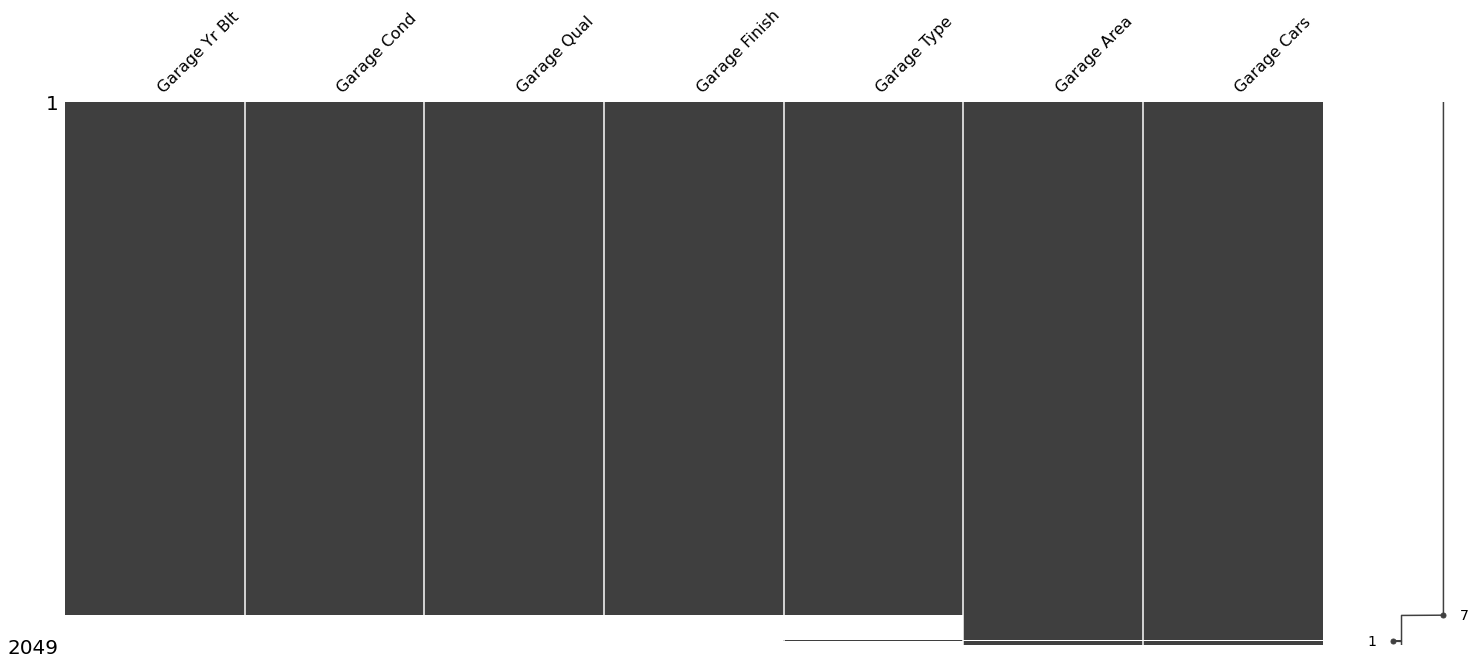

In [56]:
garage = ['Garage Yr Blt', 'Garage Cond', 'Garage Qual', 'Garage Finish', 'Garage Type',  'Garage Area', 'Garage Cars']

# Plot missingness matrix of housing
msno.matrix(housing[garage].sort_values('Garage Yr Blt'))

# Show plot
plt.show()

White lines in the missingness matrix indicate missing values. There is an interesting trend in the other columns that have missing values. They mostly have missing values in common columns. If a row has missing value in `Garage Yr Blt`, it is likely to have missing values in `Garage Cond`, `Garage Qual`, `Garage Finish`, and `Garage Type`. With the exception of a row in `Garage Type`, whereby there is no missing value. In that same row, we noticed that `Garage Area` and `Garage Cars` have missing values.



In [57]:
print("Garage Area equals 0: ", (housing['Garage Area']==0).sum())
print("Garage Cars equals 0: ", (housing['Garage Cars']==0).sum())

Garage Area equals 0:  113
Garage Cars equals 0:  113


We will first assign ‘No Garage’ to the missing values in `Garage Cond`, `Garage Qual`, `Garage Finish`, `Garage Type` if  `Garage Area` & `Garage Cars` both have 0 values.

In [58]:
housing.loc[(housing['Garage Area']==0) & (housing['Garage Cars']==0), ['Garage Cond']] = housing['Garage Cond'].fillna('None')
housing.loc[(housing['Garage Area']==0) & (housing['Garage Cars']==0), ['Garage Qual']] = housing['Garage Qual'].fillna('None')
housing.loc[(housing['Garage Area']==0) & (housing['Garage Cars']==0), ['Garage Finish']] = housing['Garage Finish'].fillna('None')
housing.loc[(housing['Garage Area']==0) & (housing['Garage Cars']==0), ['Garage Type']] = housing['Garage Type'].fillna('None')

For houses with no garage, we will assign the original construction date to `Garage Yr Blt`.

In [59]:
housing.loc[(housing['Garage Area']==0) & (housing['Garage Cars']==0), ['Garage Yr Blt']] = housing['Year Built']

Let's investigate the remaining missing values in the garage variables.

In [60]:
display(housing[(housing['Garage Area'].isna()) & (housing['Garage Cars'].isna())][garage])

,Garage Yr Blt,Garage Cond,Garage Qual,Garage Finish,Garage Type,Garage Area,Garage Cars
1712,NaN,NaN,NaN,NaN,Detchd,NaN,NaN


It seems like the house above actually has a garage. There are several ways we can impute missing values for the garage variables. We will later look into multiple imputation using IterativeImputer in sklearn for imputing missing numerical values, and using KNN imputation for imputing missing categorical values.

#### Basement Variables
Altogether, there are 11 variables related to basement. `Bsmt Exposure` has 58 missing values, `BsmtFin Type 2` has 56 missing values, `Bsmt Cond `, `Bsmt Qual`, `BsmtFin Type 1`, have 55 missing values, and both `Bsmt Half Bath` & `Bsmt Full Bath` have 2 missing values. The remaining 4 variables, `BsmtFin SF 1 `, `BsmtFin SF 2`, `Bsmt Unf SF`, and `Total Bsmt SF ` have 1 missing value.

**1. Bsmt Exposure**

Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
**2. Bsmt Cond**

Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
       
**3. Bsmt Qual**

Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

**4. BsmtFin Type 1**

BsmtFin Type 1	(Ordinal): Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

**5. BsmtFin SF 1**
	
BsmtFin SF 1 (Continuous): Type 1 finished square feet


**6. BsmtFinType 2**	

BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


**7. BsmtFin SF 2**	

BsmtFin SF 2 (Continuous): Type 2 finished square feet


**8. Bsmt Unf SF**	

Bsmt Unf SF (Continuous): Unfinished square feet of basement area


**9. Total Bsmt SF**	

Total Bsmt SF (Continuous): Total square feet of basement area


**10. Bsmt Full Bath**	

Bsmt Full Bath (Discrete): Basement full bathrooms


**11. Bsmt Half Bath**

Bsmt Half Bath (Discrete): Basement half bathrooms


We want to make sure that if a house has a basement, it means that all of the basement variables should not be NA. For this we will plot the missingness matrix to visualise.

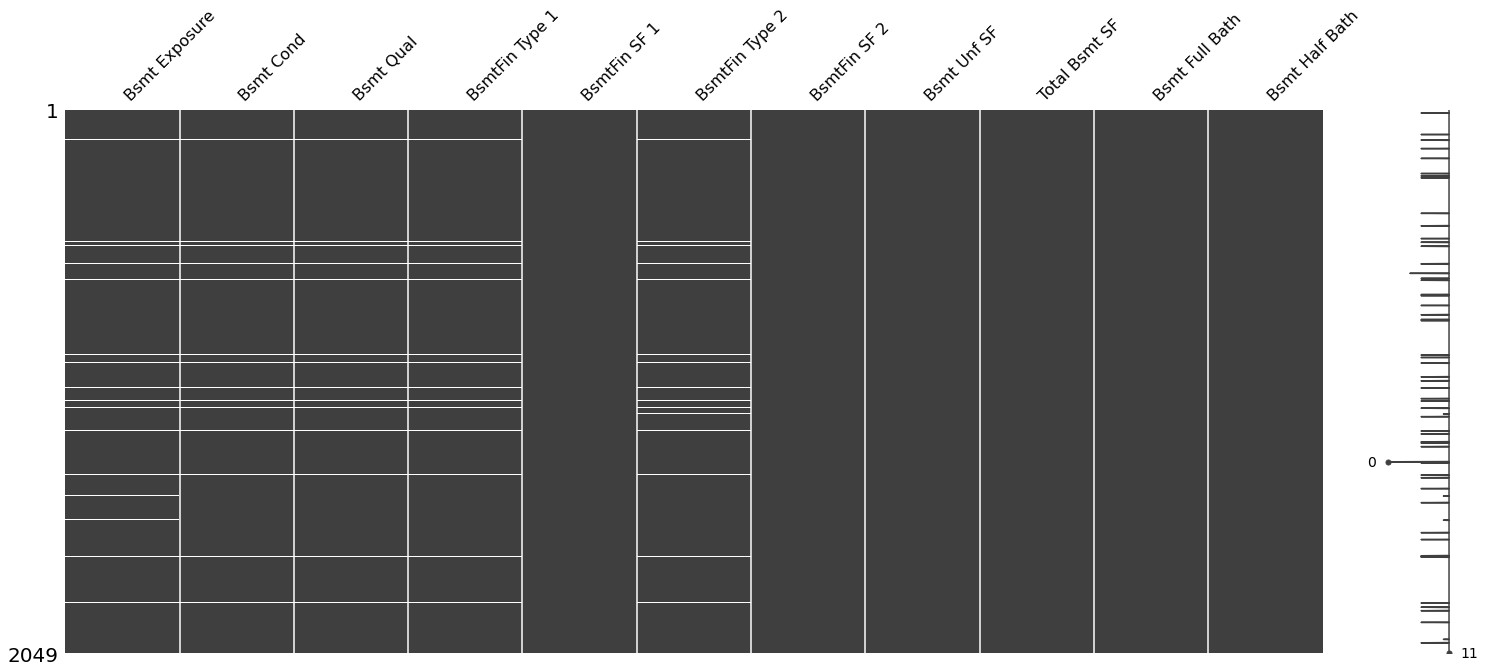

In [61]:
basement = ['Bsmt Exposure', 'Bsmt Cond', 'Bsmt Qual', 'BsmtFin Type 1', 'BsmtFin SF 1',  'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']

# Plot missingness matrix of housing
msno.matrix(housing[basement])

# Show plot
plt.show()

It seems that 55 houses have no basement as they have missing values in `Bsmt Exposure`, `Bsmt Cond`, `Bsmt Qual`, `BsmtFin Type 1`, & `BsmtFin Type 2` variables. We will first assign ‘No Basement’ to these missing values

In [62]:
housing.loc[(housing['Bsmt Exposure'].isna()) & (housing['Bsmt Cond'].isna()) & (housing['Bsmt Qual'].isna()) & (housing['BsmtFin Type 1'].isna()) & (housing['BsmtFin Type 2'].isna()), ['Bsmt Exposure']] = housing['Bsmt Exposure'].fillna('None')
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'].isna()) & (housing['Bsmt Qual'].isna()) & (housing['BsmtFin Type 1'].isna()) & (housing['BsmtFin Type 2'].isna()), ['Bsmt Cond']] = housing['Bsmt Cond'].fillna('None')
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'].isna()) & (housing['BsmtFin Type 1'].isna()) & (housing['BsmtFin Type 2'].isna()), ['Bsmt Qual']] = housing['Bsmt Qual'].fillna('None')
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'].isna()) & (housing['BsmtFin Type 2'].isna()), ['BsmtFin Type 1']] = housing['BsmtFin Type 1'].fillna('None')
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'] == 'None') & (housing['BsmtFin Type 2'].isna()), ['BsmtFin Type 2']] = housing['BsmtFin Type 2'].fillna('None')

Similarly, for houses with no basements, we will assign 0 values to `BsmtFin SF 1`, `BsmtFin SF 2`, `Bsmt Unf SF`, `Total Bsmt SF`, `Bsmt Full Bath`, and `Bsmt Half Bath`.

In [63]:
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'] == 'None') & (housing['BsmtFin Type 2'] == 'None'), ['BsmtFin SF 1']] = 0
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'] == 'None') & (housing['BsmtFin Type 2'] == 'None'), ['BsmtFin SF 2']] = 0
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'] == 'None') & (housing['BsmtFin Type 2'] == 'None'), ['Bsmt Unf SF']] = 0
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'] == 'None') & (housing['BsmtFin Type 2'] == 'None'), ['Total Bsmt SF']] = 0
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'] == 'None') & (housing['BsmtFin Type 2'] == 'None'), ['Bsmt Full Bath']] = 0
housing.loc[(housing['Bsmt Exposure'] == 'None') & (housing['Bsmt Cond'] == 'None') & (housing['Bsmt Qual'] == 'None') & (housing['BsmtFin Type 1'] == 'None') & (housing['BsmtFin Type 2'] == 'None'), ['Bsmt Half Bath']] = 0

Let's investigate the remaining missing values in the basement variables.

In [64]:
housing[basement].isnull().sum()

Bsmt Exposure     3
Bsmt Cond         0
Bsmt Qual         0
BsmtFin Type 1    0
BsmtFin SF 1      0
BsmtFin Type 2    1
BsmtFin SF 2      0
Bsmt Unf SF       0
Total Bsmt SF     0
Bsmt Full Bath    0
Bsmt Half Bath    0
dtype: int64

In [65]:
display(housing[(housing['Bsmt Exposure'].isna())][basement])
display(housing[(housing['BsmtFin Type 2'].isna())][basement])

,Bsmt Exposure,Bsmt Cond,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1456,NaN,TA,Gd,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1547,NaN,TA,Gd,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1997,NaN,TA,Gd,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


,Bsmt Exposure,Bsmt Cond,Bsmt Qual,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
1147,No,TA,Gd,GLQ,1124.0,NaN,479.0,1603.0,3206.0,1.0,0.0


It seems like the houses above actually have a basement. There are several ways we can impute missing values for the garage variables. We will later look into using KNN imputation for imputing missing categorical values.

#### Masonry Variables

Both `Mas Vnr Type` & `Mas Vnr Area` variables have 22 missing values.

**1. Mas Vnr Type**

Mas Vnr Type (Nominal): Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       

**2. Mas Vnr Area**

Mas Vnr Area (Continuous): Masonry veneer area in square feet

If a house has a masonry veneer, it means that both `Mas Vnr Type` and `Mas Vnr Area` should not be NA.

In [66]:
print("Mas Vnr Area equals 0: ", (housing['Mas Vnr Area']==0).sum())

Mas Vnr Area equals 0:  1216


In [67]:
# if Mas Vnr Type is null & Mas Vnr Area equals to 0 or null, assign 'None' to Mas Vnr Type
housing.loc[(housing['Mas Vnr Type'].isna()) & ( (housing['Mas Vnr Area'].isna()) | (housing['Mas Vnr Area'] == 0)), ['Mas Vnr Type']] = housing['Mas Vnr Type'].fillna('None')

In [68]:
# if Mas Vnr Type is 'None' & Mas Vnr Area equals to null, assign 0 to Mas Vnr Area
housing.loc[(housing['Mas Vnr Type'] == 'None') & (housing['Mas Vnr Area'].isna()), ['Mas Vnr Area']] = 0

In [69]:
housing['Mas Vnr Type'].value_counts()

None       1240
BrkFace     630
Stone       166
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

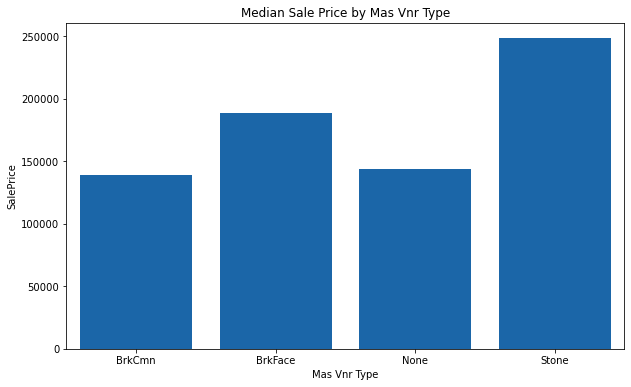

In [70]:
# plot median sale price by Mas Vnr Type
plt.figure(figsize=(10,6))

sns.barplot(x='Mas Vnr Type', y='SalePrice', data=housing.groupby('Mas Vnr Type')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Mas Vnr Type')

plt.show()

Houses with Masonary Veneer type made out of stone have higher median sale price.

In [71]:
# Check for any nulls
housing[['Mas Vnr Type', 'Mas Vnr Type']].isnull().sum()

Mas Vnr Type    0
Mas Vnr Type    0
dtype: int64

In [72]:
# check if any houses with no masonry veneer have a masonry veneer area
display(housing[(housing['Mas Vnr Type'] == 'None') & (housing['Mas Vnr Area'] > 0)][['Mas Vnr Type', 'Mas Vnr Area']])

# check if any houses with a masonry veneer have masonry veneer area equals to 0
display(housing[(housing['Mas Vnr Type'] != 'None') & (housing['Mas Vnr Area'] == 0)][['Mas Vnr Type', 'Mas Vnr Area']])

,Mas Vnr Type,Mas Vnr Area
765,None,1.0
810,None,288.0
1148,None,1.0
1684,None,1.0
1832,None,344.0


,Mas Vnr Type,Mas Vnr Area
669,BrkFace,0.0
1136,BrkFace,0.0
1187,Stone,0.0


For houses with no masonry veneer, but with a masonry veneer area of 1, we will just default the area to be 0.

In [73]:
housing.loc[(housing['Mas Vnr Type'] == 'None') & (housing['Mas Vnr Area'] == 1), ['Mas Vnr Area']] = 0

For the remaining houses, it seems like they do have a masonry veneer. Let's fill the respective values with null values first.

In [74]:
housing.loc[(housing['Mas Vnr Type'] == 'None') & (housing['Mas Vnr Area'] > 0), ['Mas Vnr Type']] = np.nan
housing.loc[(housing['Mas Vnr Type']  !=  'None') & (housing['Mas Vnr Area'] == 0), ['Mas Vnr Area']] = np.nan

In [75]:
housing[['Mas Vnr Type', 'Mas Vnr Area']].isnull().sum()

Mas Vnr Type    2
Mas Vnr Area    3
dtype: int64

 There are several ways we can impute missing values for masonry variables. We will later look into multiple imputation using IterativeImputer in sklearn for imputing missing numerical values, and using KNN imputation for imputing missing categorical values.

#### Multiple imputation for missing numerical values
We will compute multiple imputation of the numerical values on the training set and use it to fill the missing numerical values in the training set. Scikit-Learn provides a handy class to take care of missing values: IterativeImputer.

The IterativeImputer performs multiple regressions on random samples of the data and aggregates for imputing the missing values.

In [76]:
# get sample rows with missing numerical values
sample_incomplete_numeric_rows = housing[housing[numeric_features].isnull().any(axis=1)].head()
sample_incomplete_numeric_rows 

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,None,IR1,Lvl,...,0,0,None,MnPrv,None,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,None,IR1,Lvl,...,0,0,None,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,...,0,0,None,None,None,0,7,2008,WD,198000


In [77]:
# Applying multiple imputation for missing numerical values

# Initialize IterativeImputer
imp = IterativeImputer(random_state=123)

# Copy housing to imp_housing_numeric_missing
imp_housing_numeric_missing = housing.copy(deep=True)

# Impute using fit_tranform on the numerical features of the housing dataframe
imp_housing_numeric_missing[numeric_features] = np.round(imp.fit_transform(housing[numeric_features]))

In [78]:
int_cols = [col for col in housing.select_dtypes(include=['int16', 'int32', 'int64']).columns]

# convert the following columns to int
imp_housing_numeric_missing[int_cols] = imp_housing_numeric_missing[int_cols].astype(int)

In [79]:
# compare the sample rows with missing numerical values with its imputed values
display(housing.loc[sample_incomplete_numeric_rows.index.values].head())
display(imp_housing_numeric_missing.loc[sample_incomplete_numeric_rows.index.values].head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,None,IR1,Lvl,...,0,0,None,MnPrv,None,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,None,IR1,Lvl,...,0,0,None,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,...,0,0,None,None,None,0,7,2008,WD,198000


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,74.0,13517,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,3,2010,WD,130500
7,145,535154050,20,RL,75.0,12160,Pave,None,IR1,Lvl,...,0,0,None,MnPrv,None,0,5,2010,COD,142000
8,1942,535353130,20,RL,79.0,15783,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,61.0,7980,Pave,None,IR1,Lvl,...,0,0,None,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,73.0,11700,Pave,Grvl,IR1,HLS,...,0,0,None,None,None,0,7,2008,WD,198000


#### KNN imputation of missing categorical values
We will compute KNN imputation of the categorical values on the training set and use it to fill the missing categorical values in the training set. Scikit-Learn provides a handy class to take care of missing values: KNNImputer.

In order to impute missing categorical values, we will need to convert non-missing categorical columns to ordinal values. We will imput OrdinalEncoder from sklearn preprocessing. The downside of this function is that it cannot handle NaNs.Therefore we need to skip the NaNs and then convert the categorical values. We will create a unique encoder for each column and storing them using a dictionary. Using the ordinal DataFrame, we will impute the missing values using KNN imputation. Finally, we will convert back from ordinal values to categorical values.

In [80]:
# get sample rows with missing categorical values
sample_incomplete_categorical_rows = housing[housing[categorical_features].isnull().any(axis=1)].head()
sample_incomplete_categorical_rows 

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
810,2529,534129230,60,RL,80.0,10400,Pave,None,Reg,Lvl,...,147,0,None,None,None,0,11,2006,WD,165150
1147,445,528142130,20,RL,85.0,10655,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,10,2009,WD,284000
1456,1797,528458090,60,FV,81.0,10411,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,5,2010,WD,221500
1712,2237,910201180,70,RM,50.0,9060,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,None,0,3,2007,WD,150909


In [81]:
# Copy the dataframe with imputed numerical values to imp_housing_categorical_missing
imp_housing_categorical_missing = imp_housing_numeric_missing.copy(deep=True)

In [82]:
# Create dictionary for ordinal encoders
ordinal_enc_dict = {}

# only loop over the categorical features
for col_name in imp_housing_categorical_missing[categorical_features]: 
    # Create Ordinal encoder for col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = imp_housing_categorical_missing[col_name]
    
    # Select non-null values of col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Store the values to non-null values of the column
    imp_housing_categorical_missing.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [83]:
# Applying knn imputation for missing categorical values

# Create KNN imputer
knn_imp = KNNImputer(n_neighbors=5, weights ='distance') 
# by setting weights = 'distance' : we weight points by the inverse of their distance. 
# in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

# Impute using fit_tranform 
imp_housing_categorical_missing.iloc[:,:] = np.round(knn_imp.fit_transform(imp_housing_categorical_missing))

# Loop over the column names 
for col_name in imp_housing_categorical_missing[categorical_features]:
    # Reshape the data
    reshaped = imp_housing_categorical_missing[col_name].values.reshape(-1, 1)
    
    # Perform inverse transform of the ordinally encoded columns
    imp_housing_categorical_missing[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

In [84]:
int_cols = [col for col in housing.select_dtypes(include=['int16', 'int32', 'int64']).columns]

# convert the following columns to int
imp_housing_categorical_missing[int_cols] = imp_housing_categorical_missing[int_cols].astype(int)

In [85]:
# compare the sample rows with missing categorical values with its imputed values
display(housing.loc[sample_incomplete_categorical_rows.index.values].head())
display(imp_housing_categorical_missing.loc[sample_incomplete_categorical_rows.index.values].head())

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
810,2529,534129230,60,RL,80.0,10400,Pave,None,Reg,Lvl,...,147,0,None,None,None,0,11,2006,WD,165150
1147,445,528142130,20,RL,85.0,10655,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,10,2009,WD,284000
1456,1797,528458090,60,FV,81.0,10411,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,5,2010,WD,221500
1712,2237,910201180,70,RM,50.0,9060,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,None,0,3,2007,WD,150909


,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
810,2529,534129230,60,RL,80.0,10400,Pave,None,Reg,Lvl,...,147,0,None,None,None,0,11,2006,WD,165150
1147,445,528142130,20,RL,85.0,10655,Pave,None,IR1,Lvl,...,0,0,None,None,None,0,10,2009,WD,284000
1456,1797,528458090,60,FV,81.0,10411,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,None,Reg,Lvl,...,0,0,None,None,None,0,5,2010,WD,221500
1712,2237,910201180,70,RM,50.0,9060,Pave,None,Reg,Lvl,...,0,0,None,MnPrv,None,0,3,2007,WD,150909


In [86]:
# generate a final copy of the imputed dataframe
housing_imp = imp_housing_categorical_missing.copy(deep=True)

#### Final check

In [87]:
# check to see if there are any missing values in our dataframe
print("Data nulls:", housing_imp.isnull().sum().sum())

Data nulls: 0


## Label Encoding
### Treating ordinal variables
At this point, we have made sure that all variables with missing values have been taken care. Next, we will need to take care of our  categorical variables. Altogether, there are 22 nominal & 23 ordinal variables. For categorical variables with clear ordinality, we will have to label encode these values.

1. [Lot Shape](#Lot-Shape)
2. [Utilities](#Utilities)
3. [Land Slope](#Land-Slope)
4. [Overall Variables](#Overall-Variables)
5. [Exterior Variables](#Exterior-Variables)
6. [Basement Variables ](#Basement-Variables-(label-encoding))
7. [Heating QC](#Heating-QC)
8. [Electrical](#Electrical)
9. [Kitchen Qual](#Kitchen-Qual)
10. [Functional](#Functional)
11. [Fireplace Qu](#Fireplace-Qu)
12. [Garage Variables ](#Garage-Variables-(label-encoding))
13. [Paved Drive](#Paved-Drive)
14. [Pool QC](#Pool-QC)
15. [Fence ](#Fence-(label-encoding))

In [88]:
# For reference
ordinal_cols = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual',
                'Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual',
                'Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']

#### Lot Shape
**1. Lot Shape**

Lot Shape (Ordinal): General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
The values here seem to be ordinal with "Regular" being the best.

In [89]:
housing_imp['Lot Shape'].value_counts()

Reg    1295
IR1     691
IR2      55
IR3       8
Name: Lot Shape, dtype: int64

In [90]:
housing_imp['Lot Shape'] = housing_imp['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})

#### Utilities
**1. Utilities**

Utilities (Ordinal): Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only

In [91]:
housing_imp['Utilities'].value_counts()

AllPub    2047
NoSeWa       1
NoSewr       1
Name: Utilities, dtype: int64

For this categorical feature all records are "AllPub", except for 1 with "NoSeWa" and 1 with "NoSewr". The impact of Utilities on SalePrice will likely be marginal, given that majority of the houses have all public utilities. We'll probably look into dropping this feature later on, but for now, let's encode the values.

In [92]:
housing_imp['Utilities'] = housing_imp['Utilities'].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})

#### Land Slope
**1. Land Slope**

Land Slope (Ordinal): Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

It is clear that the values are ordinal. We'll proceed to label encode these values.

In [93]:
housing_imp['Land Slope'].value_counts()

Gtl    1951
Mod      88
Sev      10
Name: Land Slope, dtype: int64

In [94]:
housing_imp['Land Slope'] = housing_imp['Land Slope'].map({'Gtl':3,'Mod':2,'Sev':1})

#### Overall Variables
**1. Overall Qual**

Overall Qual (Ordinal): Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor


**2. Overall Cond**

Overall Cond (Ordinal): Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

It seems that the values in `Overall Qual` & `Overall Cond` are already encoded.

In [95]:
housing_imp['Overall Qual'].value_counts()

5     563
6     506
7     431
8     250
4     159
9      77
3      29
10     21
2       9
1       4
Name: Overall Qual, dtype: int64

In [96]:
housing_imp['Overall Cond'].value_counts()

5    1166
6     368
7     270
8     101
4      70
3      35
9      29
2       6
1       4
Name: Overall Cond, dtype: int64

#### Exterior Variables
**1. Exter Qual**

Exter Qual (Ordinal): Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
**2. Exter Cond**

Exter Cond (Ordinal): Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
       
It is clear that the values in the exterior variables are ordinal. Let's proceed to label encode these values.

In [97]:
housing_imp['Exter Qual'].value_counts()

TA    1247
Gd     697
Ex      79
Fa      26
Name: Exter Qual, dtype: int64

In [98]:
housing_imp['Exter Cond'].value_counts()

TA    1776
Gd     215
Fa      49
Ex       7
Po       2
Name: Exter Cond, dtype: int64

In [99]:
housing_imp['Exter Qual'] = housing_imp['Exter Qual'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})
housing_imp['Exter Cond'] = housing_imp['Exter Cond'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})

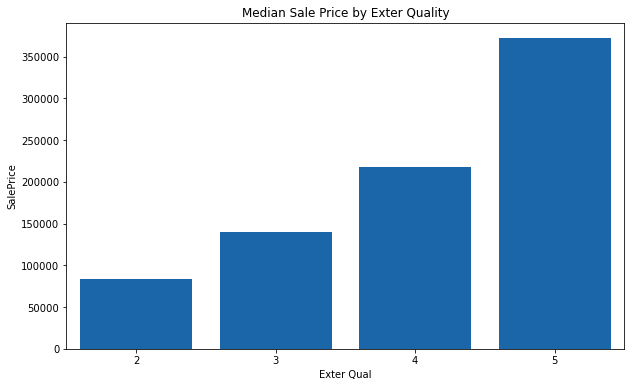

In [100]:
# plot median sale price by Exter Qual
plt.figure(figsize=(10,6))

sns.barplot(x='Exter Qual', y='SalePrice', data=housing_imp.groupby('Exter Qual')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Exter Quality')

plt.show()

Houses with higher rating on exterior quality seem to have higher median sale price. Looking at the value counts, all the houses in the training set have its exterior quality rated 'Fair' and above.

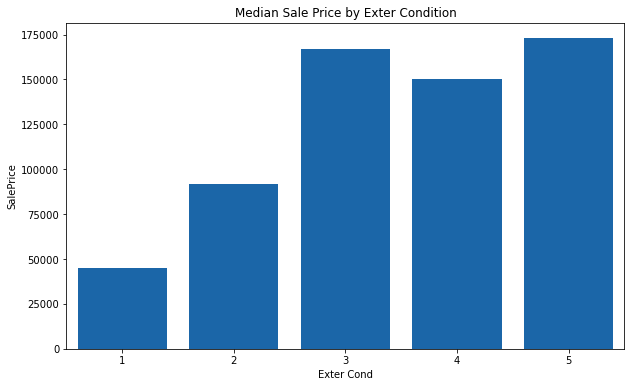

In [101]:
# plot median sale price by Exter Cond
plt.figure(figsize=(10,6))

sns.barplot(x='Exter Cond', y='SalePrice', data=housing_imp.groupby('Exter Cond')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Exter Condition')

plt.show()

#### Basement Variables (label encoding)
**1. Bsmt Exposure**

Bsmt Exposure	(Ordinal): Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
**2. Bsmt Cond**

Bsmt Cond (Ordinal): Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
       
       
**3. Bsmt Qual**

Bsmt Qual (Ordinal): Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

**4. BsmtFin Type 1**

BsmtFin Type 1	(Ordinal): Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement


**5. BsmtFinType 2**	

BsmtFinType 2	(Ordinal): Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

The values in the basement variables are ordinal. Let's proceed to label encode these values.

In [102]:
housing_imp['Bsmt Exposure'] = housing_imp['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
housing_imp['Bsmt Cond'] = housing_imp['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3, 'Fa':2, 'Po':1, 'None':0})
housing_imp['Bsmt Qual'] = housing_imp['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3, 'Fa':2, 'Po':1, 'None':0})
housing_imp['BsmtFin Type 1'] = housing_imp['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
housing_imp['BsmtFin Type 2'] = housing_imp['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})

#### Heating QC
**1. HeatingQC**

HeatingQC (Ordinal): Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

The values in `HeatingQC` are ordinal. Let's proceed to label encode these values.

In [103]:
housing_imp['Heating QC'].value_counts()

Ex    1063
TA     597
Gd     319
Fa      67
Po       3
Name: Heating QC, dtype: int64

In [104]:
housing_imp['Heating QC'] = housing_imp['Heating QC'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})

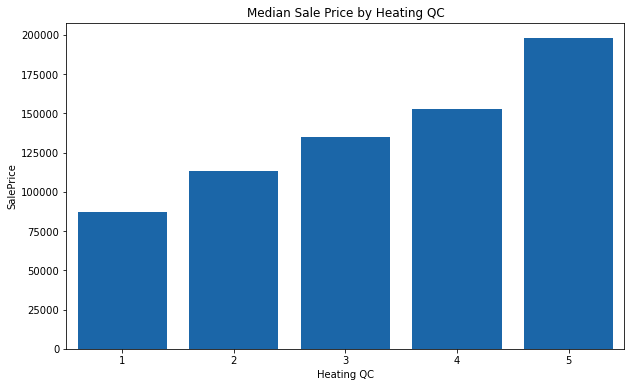

In [105]:
# plot median sale price by Heating QC
plt.figure(figsize=(10,6))

sns.barplot(x='Heating QC', y='SalePrice', data=housing_imp.groupby('Heating QC')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Heating QC')

plt.show()

Houses with better heating quality and condition seem to have higher median sale price.

#### Electrical

**1. Electrical**

Electrical (Ordinal): Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
Let's proceed to label encode our values.

In [106]:
housing_imp['Electrical'].value_counts()

SBrkr    1866
FuseA     140
FuseF      35
FuseP       7
Mix         1
Name: Electrical, dtype: int64

In [107]:
housing_imp['Electrical'] = housing_imp['Electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1})

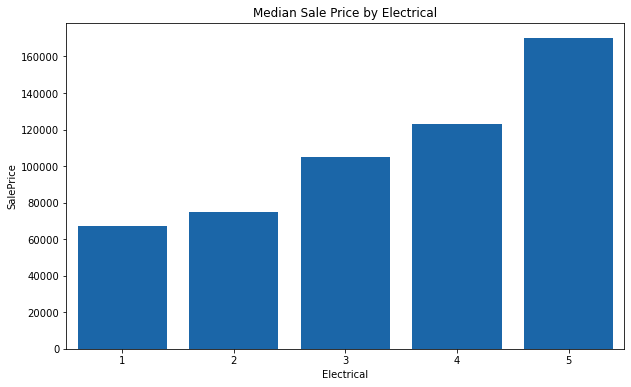

In [108]:
# plot median sale price by Electrical
plt.figure(figsize=(10,6))

sns.barplot(x='Electrical', y='SalePrice', data=housing_imp.groupby('Electrical')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Electrical')

plt.show()

It makes sense for a house with mixed electrical system to be cheap as it poses more safety hazard. There is only one house with mixed electrical system in the training set. We can see that houses without standard circuit breakers & romex have lower median sales price.

#### Kitchen Qual

**1. Kitchen Qual**

KitchenQual (Ordinal): Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       
Let's proceed to label encode our values.

In [109]:
housing_imp['Kitchen Qual'].value_counts()

TA    1047
Gd     806
Ex     149
Fa      47
Name: Kitchen Qual, dtype: int64

In [110]:
housing_imp['Kitchen Qual'] = housing_imp['Kitchen Qual'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})

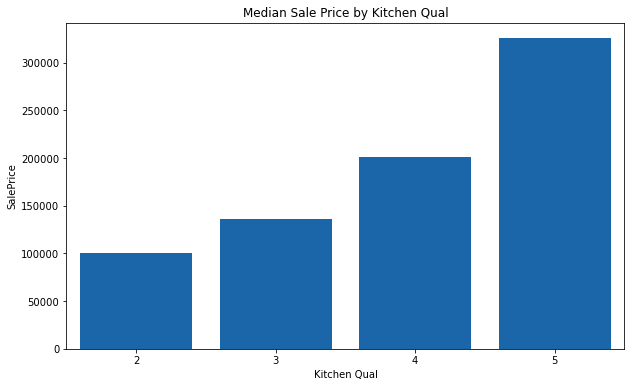

In [111]:
# plot median sale price by Kitchen Qual
plt.figure(figsize=(10,6))

sns.barplot(x='Kitchen Qual', y='SalePrice', data=housing_imp.groupby('Kitchen Qual')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Kitchen Qual')

plt.show()

We can see that houses with excellent kitchen quality have higher median sales prices. Majority of houses have kitchen quality rated as average.

#### Functional

**1. Functional**

Functional (Ordinal): Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
       
The values here are ordinal with 'Salvage only' being the worst and 'Typical Functionality' being the best.

In [112]:
housing_imp['Functional'].value_counts()

Typ     1913
Min1      42
Min2      42
Mod       29
Maj1      12
Maj2       7
Sev        2
Sal        2
Name: Functional, dtype: int64

In [113]:
housing_imp['Functional'] = housing_imp['Functional'].map({'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3,'Sev':2,'Sal':1})

#### Fireplace Qu

**1. Fireplace Qu**

FireplaceQu (Ordinal): Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

Let's proceed to label encode our values.

In [114]:
housing_imp['Fireplace Qu'] = housing_imp['Fireplace Qu'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'None':0})

#### Garage Variables (label encoding)

**1. Garage Cond**

Garage Cond (Ordinal): Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


**2. Garage Qual**

Garage Qual (Ordinal): Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage


**3. Garage Finish**

Garage Finish (Ordinal)	: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Let's proceed to label encode our values.

In [115]:
housing_imp['Garage Cond'] = housing_imp['Garage Cond'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'None':0})
housing_imp['Garage Qual'] = housing_imp['Garage Qual'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'None':0})
housing_imp['Garage Finish'] = housing_imp['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1, 'None':0})

#### Paved Drive

**1. Paved Drive**

Paved Drive (Ordinal): Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
The values here are ordinal with 'Paved' driveway being the best.

In [116]:
housing_imp['Paved Drive'].value_counts()

Y    1859
N     151
P      39
Name: Paved Drive, dtype: int64

In [117]:
housing_imp['Paved Drive'] = housing_imp['Paved Drive'].map({'Y':3,'P':2,'N':1})

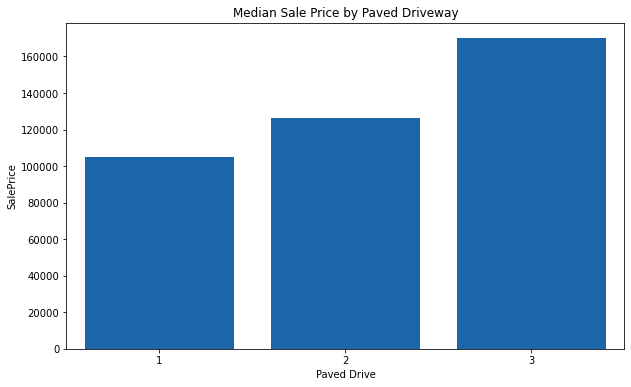

In [118]:
# plot median sale price by Paved Drive
plt.figure(figsize=(10,6))

sns.barplot(x='Paved Drive', y='SalePrice', data=housing_imp.groupby('Paved Drive')['SalePrice'].median().reset_index(),
                 color='#0468BF')
plt.title('Median Sale Price by Paved Driveway')

plt.show()

Houses with either full or partial paved driveway have higher median sales.

#### Pool QC

**1. Pool QC**

Pool QC (Ordinal): Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

Let's proceed to label encode our values.

In [119]:
housing_imp['Pool QC'] = housing_imp['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})

#### Fence (label encoding)

**1. Fence**

Fence (Ordinal): Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
Let's proceed to label encode our values.

In [120]:
housing_imp['Fence'] = housing_imp['Fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0})

## Data Visualisation
Now that we have finally encoded our ordinal variables with numeric labels, let's proceed to check the correlations again.

In [121]:
# convert the ordinal variables with numeric labels to integer type
for col in housing_imp.columns:
    if col in ordinal_cols:
        housing_imp[col] = housing_imp[col].astype(int)
    else:
        continue
        
# examine the dtypes
housing_imp[ordinal_cols].dtypes

Lot Shape         int32
Utilities         int32
Land Slope        int32
Overall Qual      int32
Overall Cond      int32
Exter Qual        int32
Exter Cond        int32
Bsmt Qual         int32
Bsmt Cond         int32
Bsmt Exposure     int32
BsmtFin Type 1    int32
BsmtFin Type 2    int32
Heating QC        int32
Electrical        int32
Kitchen Qual      int32
Functional        int32
Fireplace Qu      int32
Garage Finish     int32
Garage Qual       int32
Garage Cond       int32
Paved Drive       int32
Pool QC           int32
Fence             int32
dtype: object

In [122]:
# Split the numeric and categorical features again
new_numeric_features = [col for col in housing_imp._get_numeric_data().columns]
new_categorical_features = [col for col in housing_imp.select_dtypes(include=['object']).columns]

In [123]:
print('There are', len(new_numeric_features), 'numeric features now.')
print('There are', len(new_categorical_features), 'categorical features now.')

There are 58 numeric features now.
There are 23 categorical features now.


**Visualise the correlation heatmap again**

Saving figure correlation_heatmap_again


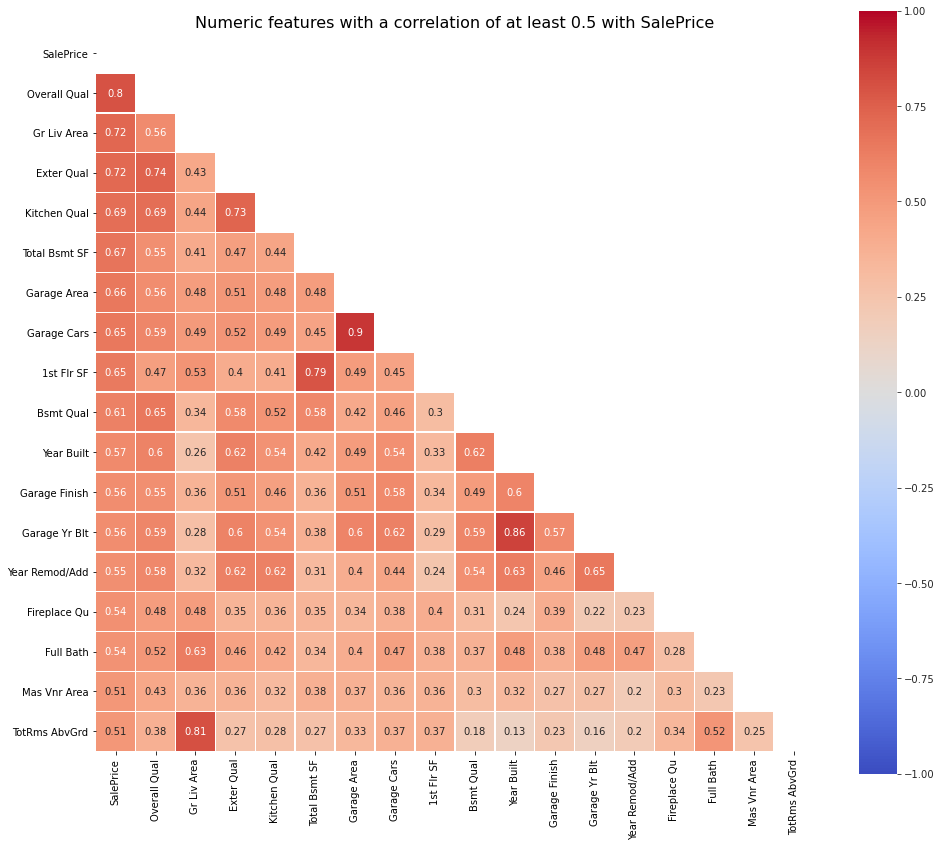

In [124]:
# Establish size of figure.
plt.figure(figsize = (14,12))

# Get correlation of variables.
corr = housing_imp[new_numeric_features].corr()['SalePrice'].sort_values(ascending=False)
corr = corr[abs(corr) > 0.5].index
corr = housing_imp[corr].corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot title
plt.title("Numeric features with a correlation of at least 0.5 with SalePrice", fontsize = 16)

# Plot our correlation heatmap, while masking the upper triangle to be white.
with sns.axes_style("white"):
    sns.heatmap(corr, mask = mask, square = True, annot = True, vmin = -1, vmax = 1, linewidths = .5, cmap= 'coolwarm')
    
save_fig("correlation_heatmap_again")

As we can see, the number of variables with a correlation of at least 0.5 with the SalePrice has increased from 11 to 17. Now, we can see that the predictor that has the highest correlation with SalePrice is `Overall Qual` .

## Next Steps

In the next notebook, we'll look into feature engineering, and the various preprocessing steps (eg. dropping highly correlated variables to reduce multicolinearity, normalising the data & one-hot encoding) to prepare our data for modeling. But before that, we'll need to apply the similar data cleaning steps onto our test set. So far, we have only applied the transformations to our training data set. Let's create custom functions for data cleaning & label encoding:

**Create a function for data cleaning**

In [125]:
def data_cleaning(df, numeric_features, categorical_features):  
    # handling missing data
    
    ## Pool QC
    # if Pool QC is null & Pool Area equals to 0, assign 'None' to Pool QC
    df.loc[(df['Pool QC'].isna()) & (df['Pool Area']==0), ['Pool QC']] = df['Pool QC'].fillna('None')
    
    ## Misc Feature
    # if Misc Feature is null & Misc Val equals to 0, assign 'None' to Misc Feature
    df.loc[(df['Misc Feature'].isna()) & (df['Misc Val'] == 0), ['Misc Feature']] = df['Misc Feature'].fillna('None') 

    ## Alley
    df['Alley'] = df['Alley'].fillna('None')

    ## Fence
    df['Fence'] = df['Fence'].fillna('None')

    ## Fireplace Qu
    # if Fireplace Qu is null & Fireplaces equals to 0, assign 'None' to Fireplace Qu
    df.loc[(df['Fireplace Qu'].isna()) & (df['Fireplaces'] == 0), ['Fireplace Qu']] = df['Fireplace Qu'].fillna('None')

    ## Garage Variables
    # assign ‘No Garage’ to the missing values in Garage Cond, Garage Qual, Garage Finish, Garage Type if Garage Area & Garage Cars both have 0 values.
    df.loc[(df['Garage Area']==0) & (df['Garage Cars']==0), ['Garage Cond']] = df['Garage Cond'].fillna('None')
    df.loc[(df['Garage Area']==0) & (df['Garage Cars']==0), ['Garage Qual']] = df['Garage Qual'].fillna('None')
    df.loc[(df['Garage Area']==0) & (df['Garage Cars']==0), ['Garage Finish']] = df['Garage Finish'].fillna('None')
    df.loc[(df['Garage Area']==0) & (df['Garage Cars']==0), ['Garage Type']] = df['Garage Type'].fillna('None')

    # For houses with no garage, we will assign the original construction date to Garage Yr Blt
    df.loc[(df['Garage Area']==0) & (df['Garage Cars']==0), ['Garage Yr Blt']] = df['Year Built']

    ## Basement Variables
    # assign ‘No Basement’ to the missing values if there are missing values in all Bsmt Exposure, Bsmt Cond, Bsmt Qual, BsmtFin Type 1, & BsmtFin Type 2 variables. 
    df.loc[(df['Bsmt Exposure'].isna()) & (df['Bsmt Cond'].isna()) & (df['Bsmt Qual'].isna()) & (df['BsmtFin Type 1'].isna()) & (df['BsmtFin Type 2'].isna()), ['Bsmt Exposure']] = df['Bsmt Exposure'].fillna('None')
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'].isna()) & (df['Bsmt Qual'].isna()) & (df['BsmtFin Type 1'].isna()) & (df['BsmtFin Type 2'].isna()), ['Bsmt Cond']] = df['Bsmt Cond'].fillna('None')
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'].isna()) & (df['BsmtFin Type 1'].isna()) & (df['BsmtFin Type 2'].isna()), ['Bsmt Qual']] = df['Bsmt Qual'].fillna('None')
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'].isna()) & (df['BsmtFin Type 2'].isna()), ['BsmtFin Type 1']] = df['BsmtFin Type 1'].fillna('None')
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'] == 'None') & (df['BsmtFin Type 2'].isna()), ['BsmtFin Type 2']] = df['BsmtFin Type 2'].fillna('None')

    # for houses with no basements, we will assign 0 values to BsmtFin SF 1, BsmtFin SF 2, Bsmt Unf SF, Total Bsmt SF, Bsmt Full Bath, and Bsmt Half Bath
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'] == 'None') & (df['BsmtFin Type 2'] == 'None'), ['BsmtFin SF 1']] = 0
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'] == 'None') & (df['BsmtFin Type 2'] == 'None'), ['BsmtFin SF 2']] = 0
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'] == 'None') & (df['BsmtFin Type 2'] == 'None'), ['Bsmt Unf SF']] = 0
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'] == 'None') & (df['BsmtFin Type 2'] == 'None'), ['Total Bsmt SF']] = 0
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'] == 'None') & (df['BsmtFin Type 2'] == 'None'), ['Bsmt Full Bath']] = 0
    df.loc[(df['Bsmt Exposure'] == 'None') & (df['Bsmt Cond'] == 'None') & (df['Bsmt Qual'] == 'None') & (df['BsmtFin Type 1'] == 'None') & (df['BsmtFin Type 2'] == 'None'), ['Bsmt Half Bath']] = 0

    ## Masonry Variables
    # if Mas Vnr Type is null & Mas Vnr Area equals to 0 or null, assign 'None' to Mas Vnr Type
    df.loc[(df['Mas Vnr Type'].isna()) & ( (df['Mas Vnr Area'].isna()) | (df['Mas Vnr Area'] == 0)), ['Mas Vnr Type']] = df['Mas Vnr Type'].fillna('None')

    # if Mas Vnr Type is 'None' & Mas Vnr Area equals to null, assign 0 to Mas Vnr Area
    df.loc[(df['Mas Vnr Type'] == 'None') & (df['Mas Vnr Area'].isna()), ['Mas Vnr Area']] = 0

    # for houses with no masonry veneer, but with a masonry veneer area of 1, we will just default the area to be 0.
    df.loc[(df['Mas Vnr Type'] == 'None') & (df['Mas Vnr Area'] == 1), ['Mas Vnr Area']] = 0

    # for the remaining houses that might possibly have masonry veneer, we will fill the respective values with null values first.
    df.loc[(df['Mas Vnr Type'] == 'None') & (df['Mas Vnr Area'] > 0), ['Mas Vnr Type']] = np.nan
    df.loc[(df['Mas Vnr Type']  !=  'None') & (df['Mas Vnr Area'] == 0), ['Mas Vnr Area']] = np.nan
 

    ## Applying multiple imputation for missing numerical values
    # Initialize IterativeImputer
    imp = IterativeImputer(random_state=123)

    # Copy df to imp_df_numeric_missing
    imp_df_numeric_missing = df.copy(deep=True)

    # Impute using fit_tranform on the numerical features of the dataframe
    imp_df_numeric_missing[numeric_features] = np.round(imp.fit_transform(df[numeric_features]))
    
    int_cols = [col for col in df.select_dtypes(include=['int16', 'int32', 'int64']).columns]
    
    # convert the following columns to int
    imp_df_numeric_missing[int_cols] = imp_df_numeric_missing[int_cols].astype(int)
    
    
    ## Applying KNN imputation for missing categorical values
    # Copy the dataframe with imputed numerical values to imp_df_categorical_missing
    imp_df_categorical_missing = imp_df_numeric_missing.copy(deep=True)
    
    # Create dictionary for ordinal encoders
    ordinal_enc_dict = {}

    # only loop over the categorical features
    for col_name in imp_df_categorical_missing[categorical_features]: 
        # Create Ordinal encoder for col
        ordinal_enc_dict[col_name] = OrdinalEncoder()
        col = imp_df_categorical_missing[col_name]
    
        # Select non-null values of col
        col_not_null = col[col.notnull()]
        reshaped_vals = col_not_null.values.reshape(-1, 1)
        encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
        # Store the values to non-null values of the column
        imp_df_categorical_missing.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)
        
    # Create KNN imputer
    knn_imp = KNNImputer(n_neighbors=5, weights ='distance') 
    # by setting weights = 'distance' : we weight points by the inverse of their distance. 
    # in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.

    # Impute using fit_tranform 
    imp_df_categorical_missing.iloc[:,:] = np.round(knn_imp.fit_transform(imp_df_categorical_missing))

    # Loop over the column names 
    for col_name in imp_df_categorical_missing[categorical_features]:
        # Reshape the data
        reshaped = imp_df_categorical_missing[col_name].values.reshape(-1, 1)
    
        # Perform inverse transform of the ordinally encoded columns
        imp_df_categorical_missing[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

    int_cols = [col for col in df.select_dtypes(include=['int16', 'int32', 'int64']).columns]

    # convert the following columns to int
    imp_df_categorical_missing[int_cols] = imp_df_categorical_missing[int_cols].astype(int)
    
    # generate a final copy of the imputed dataframe
    df_imp = imp_df_categorical_missing.copy(deep=True)

    return df_imp

In [126]:
test_df_numeric_features = numeric_features[:-1]

In [127]:
test_df_categorical_features = categorical_features

In [128]:
test_df = data_cleaning(test_df, test_df_numeric_features, test_df_categorical_features)

In [129]:
# check to see if there are any missing values in our dataframe
print("Data nulls:", test_df.isnull().sum().sum()) 

Data nulls: 0


**Create a function for label encoding**

In [130]:
def label_encoding(df):
    ## Lot shape
    df['Lot Shape'] = df['Lot Shape'].map({'Reg':4,'IR1':3,'IR2':2,'IR3':1})

    ## Utilities
    df['Utilities'] = df['Utilities'].map({'AllPub':4,'NoSewr':3,'NoSeWa':2,'ELO':1})

    ## Land Slope
    df['Land Slope'] = df['Land Slope'].map({'Gtl':3,'Mod':2,'Sev':1})

    ## Exterior Variables
    df['Exter Qual'] = df['Exter Qual'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})
    df['Exter Cond'] = df['Exter Cond'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})

    ## Basement Variables
    df['Bsmt Exposure'] = df['Bsmt Exposure'].map({'Gd':4,'Av':3,'Mn':2,'No':1,'None':0})
    df['Bsmt Cond'] = df['Bsmt Cond'].map({'Ex':5,'Gd':4,'TA':3, 'Fa':2, 'Po':1, 'None':0})
    df['Bsmt Qual'] = df['Bsmt Qual'].map({'Ex':5,'Gd':4,'TA':3, 'Fa':2, 'Po':1, 'None':0})
    df['BsmtFin Type 1'] = df['BsmtFin Type 1'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})
    df['BsmtFin Type 2'] = df['BsmtFin Type 2'].map({'GLQ':6,'ALQ':5,'BLQ':4,'Rec':3,'LwQ':2,'Unf':1,'None':0})

    ## Heating QC
    df['Heating QC'] = df['Heating QC'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})

    ## Electrical
    df['Electrical'] = df['Electrical'].map({'SBrkr':5,'FuseA':4,'FuseF':3,'FuseP':2,'Mix':1})

    ## Kitchen Qual
    df['Kitchen Qual'] = df['Kitchen Qual'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1})

    ## Functional
    df['Functional'] = df['Functional'].map({'Typ':8, 'Min1':7, 'Min2':6, 'Mod':5, 'Maj1':4, 'Maj2':3,'Sev':2,'Sal':1})

    ## Fireplace Qu
    df['Fireplace Qu'] = df['Fireplace Qu'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'None':0})

    ## Garage Variables
    df['Garage Cond'] = df['Garage Cond'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'None':0})
    df['Garage Qual'] = df['Garage Qual'].map({'Ex':5, 'Gd':4, 'TA':3,'Fa':2,'Po':1, 'None':0})
    df['Garage Finish'] = df['Garage Finish'].map({'Fin':3,'RFn':2,'Unf':1, 'None':0})

    ## Paved Drive
    df['Paved Drive'] = df['Paved Drive'].map({'Y':3,'P':2,'N':1})

    ## Pool QC
    df['Pool QC'] = df['Pool QC'].map({'Ex':4,'Gd':3,'TA':2,'Fa':1,'None':0})

    ## Fence
    df['Fence'] = df['Fence'].map({'GdPrv':4,'MnPrv':3,'GdWo':2,'MnWw':1,'None':0})
    
    return df

In [131]:
test_df = label_encoding(test_df)

**Save the cleaned dataframes as csv file**

In [132]:
# Save cleaned training data
housing_imp.to_csv(output_path + '/train_cleaned.csv', index=False)

# Save cleaned test data
test_df.to_csv(output_path + '/test_cleaned.csv', index=False)